<a href="https://colab.research.google.com/github/mtofighi/ChilwaBasin/blob/main/ClimateAnalysis/ChilwaClimateAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <span style="color:orange">Chiwa Basin Health Model</span>

**Created using: PyCaret 3.0** <br />
**Date Updated: May 03, 2023**

# 1.0  Objective
This model use Chilwa Basin Health dataset and connect it with other environmental parameters using the PyCaret automachine learning tool.

## 1.1 Installing PyCaret
The first step to get started with PyCaret is to install PyCaret. Installation is easy and will only take a few minutes.


# 2.0 Getting the Data

The code loads a dataset from an Excel file hosted on GitHub. It converts the index of the dataset to datetime format and extracts the year and month information. The resulting dataset is then indexed by 'Year' and 'Month'. Finally, the code displays the data types of the columns and the shape of the dataset.

Here I read data from my GitHub account.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://github.com/mtofighi/ChilwaBasin/blob/main/ClimateAnalysis/Data/ChilwaBasin_Rainfall_19812018.xlsx?raw=true'
data = pd.read_excel(url)

# Convert the index to datetime format (assuming the index is in a date format)
data.index = pd.to_datetime(data.iloc[:, 0])

# Extract year and month from the index
data['Year'] = data.index.year
data['Month'] = data.index.month

# Set the columns 'Year' and 'Month' as the index
data.set_index(['Year', 'Month'], inplace=True)

# Check the type of dataset
print("Data types:", data.dtypes)

# Check the shape of the data
print("Data shape:", data.shape)

# Convert the column names to an array
headers = data.columns.to_numpy()

# Print the headers array
print("Headers:", headers)

Data types: Date         datetime64[ns]
Chanco              float64
Chingale            float64
Makoka              float64
Naminjiwa           float64
Ntaja               float64
Zomba_RTC           float64
Chimpeni            float64
Average             float64
dtype: object
Data shape: (13879, 9)
Headers: ['Date' 'Chanco' 'Chingale' 'Makoka' 'Naminjiwa' 'Ntaja' 'Zomba_RTC'
 'Chimpeni' 'Average']


# 3.0  Analyzing Missing Values

##3.1 Analysis of Missing Values in Dataset: Identification, Removal, and Visualization

The code performs an analysis of missing values in a dataset. It calculates the number and percentage of missing values for each column, sorts them in descending order based on the missing percentage, and prints the information. The missing values information is then saved as an Excel file.

Next, the code drops rows that contain any missing values (NaN) from the dataset and displays the rows with all values present. The rows with complete data are saved as an Excel file.

The code also generates a bar plot to visualize the missing values, with variables on the x-axis and the corresponding missing percentage on the y-axis. The plot is saved as a high-quality JPG file and displayed.

Overall, the code provides insights into the missing values in the dataset, presents the rows with complete data, and visualizes the missing values distribution.


Missing Values:
           Missing Values  Missing Percentage
Date                    0                 0.0
Chanco                  0                 0.0
Chingale                0                 0.0
Makoka                  0                 0.0
Naminjiwa               0                 0.0
Ntaja                   0                 0.0
Zomba_RTC               0                 0.0
Chimpeni                0                 0.0
Average                 0                 0.0

Rows with all values present:
                 Date  Chanco  Chingale  Makoka  Naminjiwa  Ntaja  Zomba_RTC  \
Year Month                                                                     
1981 1     1981-01-01    22.2      18.1    23.1       31.6    5.9        0.0   
     1     1981-01-02     0.0       0.0     2.5        7.2   13.0        0.0   
     1     1981-01-03     0.0       0.0     1.0        0.0    0.0        0.0   
     1     1981-01-04     0.0       0.0     0.0        0.0    0.0        0.0   
     1     1

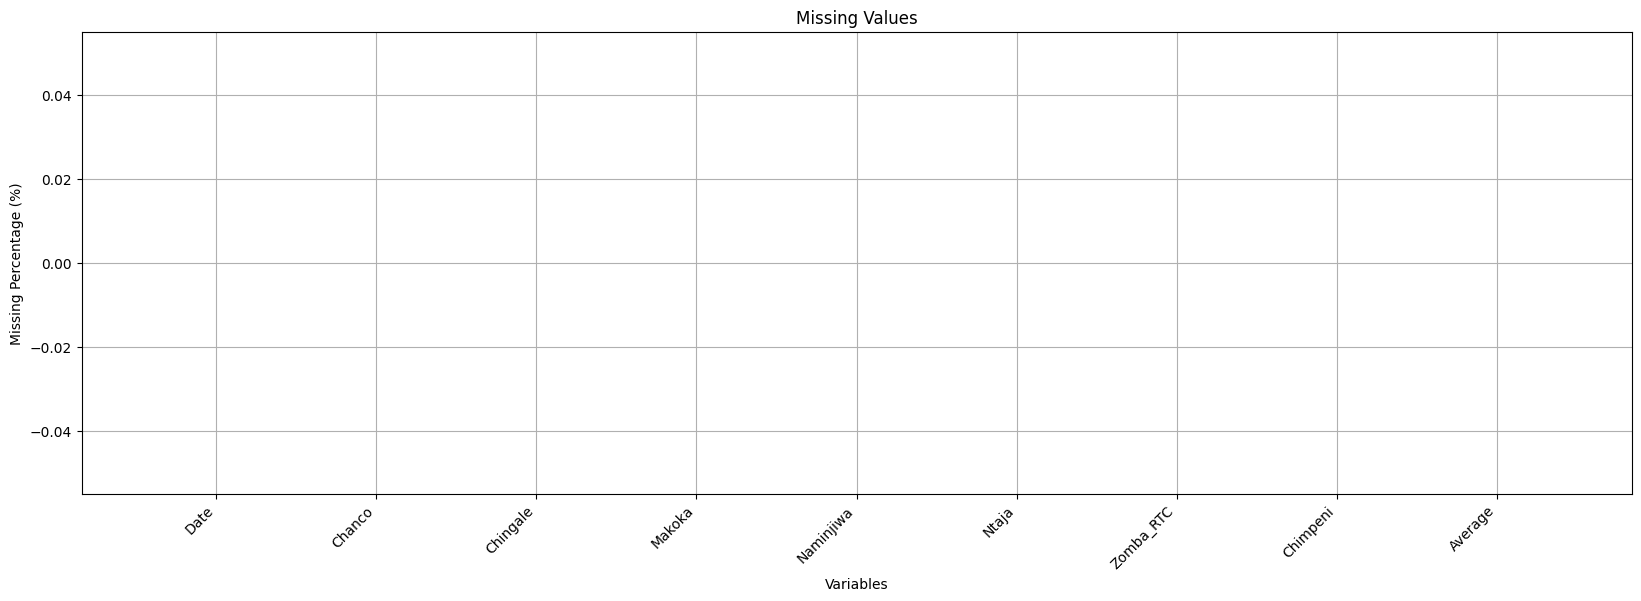

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Check for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Sort columns based on missing percentage
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)

# Print the missing values information
print("\nMissing Values:")
print(missing_df)

# Save the missing values information as an Excel file
missing_df.to_excel("missing_values.xlsx")

# Drop rows with any missing values (NaN)
non_nan_rows = data.dropna()

# Display the rows with all values present
print("\nRows with all values present:")
print(non_nan_rows.head(5))

# Save the rows with all values present as an Excel file
non_nan_rows.to_excel("non_nan_rows.xlsx")

# Plotting the missing values
plt.figure(figsize=(20, 6))
plt.bar(missing_df.index, missing_df['Missing Percentage'])
plt.xlabel('Variables')
plt.ylabel('Missing Percentage (%)')
plt.title('Missing Values')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Save the plot as a high-quality JPG file
plt.savefig('missing_values_plot.jpg', dpi=300, bbox_inches='tight')

# Save the plot as a high-quality PNG file
plt.savefig('missing_values_plot.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

## 3.2 Visualizing Missing Values with Heatmap

This code generates a heatmap to visualize the missing values in a dataset using the seaborn library. It excludes the first column of the dataset, assuming it contains non-date values. The heatmap represents missing values as colored cells, with missing values shown as blank spaces. The plot is customized by rotating the x and y-axis labels, adding a title and axis labels, and including grid lines. The resulting plot is saved as a high-quality JPG file. This code provides a quick and visual overview of the missing values distribution in the dataset.

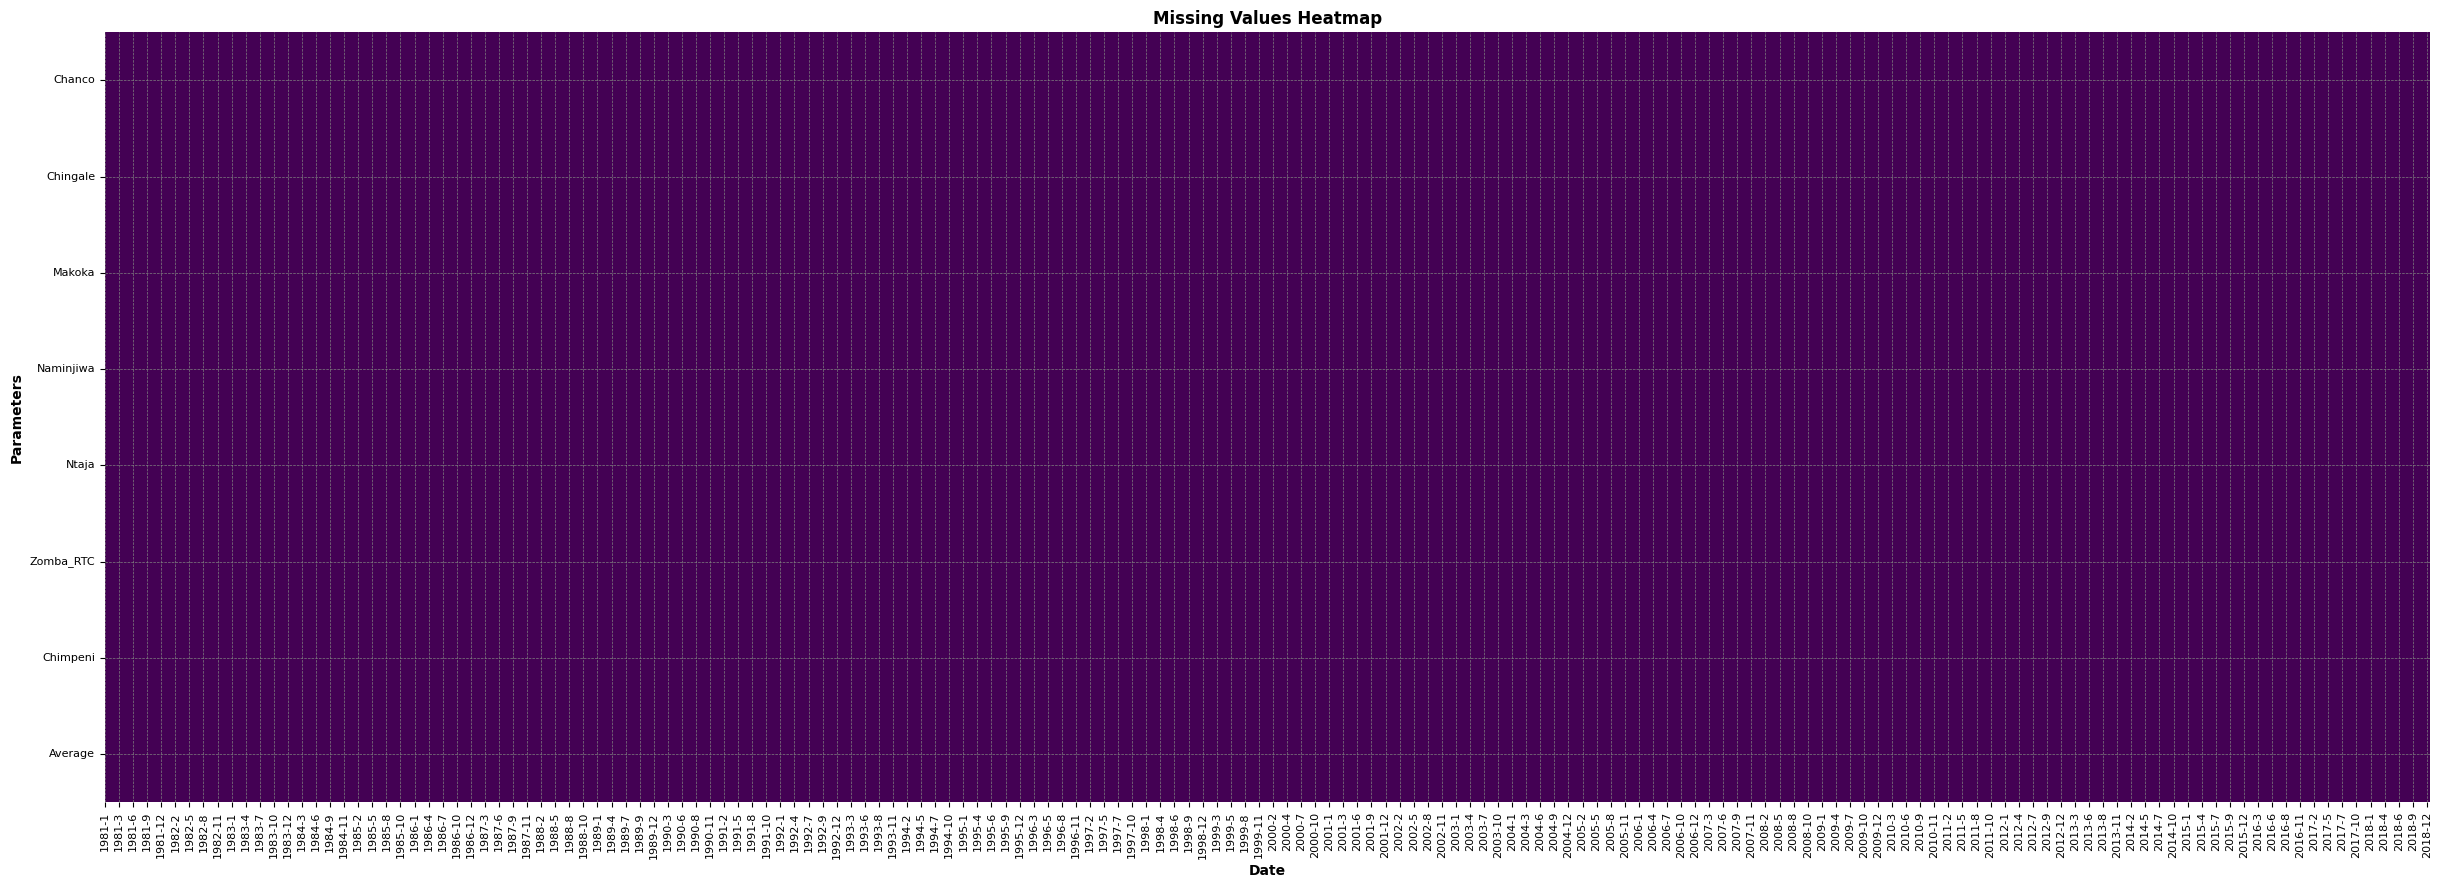

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the first column (assuming it contains non-date values)
data_without_dates = data.iloc[:, 1:]

# Create the heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(data_without_dates.isnull().transpose(), cmap='viridis', cbar=False)

# Customize the plot
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.title('Missing Values Heatmap', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Parameters', fontweight='bold')

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Save the plot in high-quality JPG format
plt.savefig('missing_values_heatmap.jpg', dpi=300, bbox_inches='tight')
plt.savefig('missing_values_heatmap.png', dpi=300, bbox_inches='tight')

plt.show()

## 3.3 Analyzing Start and End Dates for Columns with Missing Values

This code analyzes the start and end dates of columns in a dataset that have missing values. It retrieves the start and end dates for each column, calculates the duration in months and years, and generates a table with the column name, start date, end date, years of data, and months of data. The table is printed and saved as an Excel file.

In [4]:
import pandas as pd
from tabulate import tabulate
from datetime import datetime

# The dataset is called 'data'
start_dates = {}
end_dates = {}
months_data = {}
years_data = {}

for column in data.columns:
    not_missing_mask = data[column].notna()  # Boolean mask where True indicates a non-missing value
    not_missing_data = data.loc[not_missing_mask]  # Subset of data with no missing values

    if not_missing_data.empty:
        continue

    start_date = not_missing_data.iloc[0, 0]  # Value at the first row and first column
    end_date = not_missing_data.iloc[-1, 0]  # Value at the last row and first column

    start_dates[column] = start_date
    end_dates[column] = end_date
    months_data[column] = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month) + 1
    years_data[column] = end_date.year - start_date.year + 1

# Prepare the data for tabulation
table_data = []
for column, start_date in start_dates.items():
    end_date = end_dates[column]
    # Format dates to remove hour and day
    start_date = datetime.strftime(start_date, "%Y-%m")
    end_date = datetime.strftime(end_date, "%Y-%m")
    table_data.append([column, start_date, end_date, years_data[column], months_data[column]])

# Sort the table based on the number of missing data (ascending order)
table_data.sort(key=lambda x: data[x[0]].isnull().sum())

# Generate the table
table_headers = ["Column", "Start Date", "End Date", "Years Data", "Months Data"]
table = tabulate(table_data, headers=table_headers, tablefmt="pipe")

# Print the table
print(table)

# Save the table as an Excel file
df = pd.DataFrame(table_data, columns=table_headers)
df.to_excel("start_end_dates_sorted.xlsx", index=False)

| Column    | Start Date   | End Date   |   Years Data |   Months Data |
|:----------|:-------------|:-----------|-------------:|--------------:|
| Date      | 1981-01      | 2018-12    |           38 |           456 |
| Chanco    | 1981-01      | 2018-12    |           38 |           456 |
| Chingale  | 1981-01      | 2018-12    |           38 |           456 |
| Makoka    | 1981-01      | 2018-12    |           38 |           456 |
| Naminjiwa | 1981-01      | 2018-12    |           38 |           456 |
| Ntaja     | 1981-01      | 2018-12    |           38 |           456 |
| Zomba_RTC | 1981-01      | 2018-12    |           38 |           456 |
| Chimpeni  | 1981-01      | 2018-12    |           38 |           456 |
| Average   | 1981-01      | 2018-12    |           38 |           456 |


In [5]:
# Identify and print the exact date and column for missing data
for column in data.columns:
    missing_rows = data[data[column].isnull()]
    if not missing_rows.empty:
        for index, row in missing_rows.iterrows():
            date_str = '-'.join(map(str, index))  # Combine the multi-index as a string
            date = pd.to_datetime(date_str)  # Convert the string to a pandas Timestamp
            print("Missing data on date:", date.strftime('%m/%d/%Y'), " in column:", column)

## 3.5 Visualizing the Correlation

The heatmap visualizes the correlations between numerical features in the dataset, with bold and legible correlation values. The plot is saved as high-quality JPG and PNG images, and the correlation matrix is exported to an Excel file. This allows for easy identification of feature relationships and patterns in the data.

**Pearson Correlation Coefficient:**

Pearson correlation is the most widely used method for measuring the linear correlation between two continuous variables.
It assumes that the variables are normally distributed and the relationship between them is linear.
The values of Pearson correlation range from -1 to 1, where -1 indicates a perfect negative linear correlation, 1 indicates a perfect positive linear correlation, and 0 indicates no linear correlation.

**Spearman Rank Correlation:**
Spearman correlation is a non-parametric measure of rank correlation between two variables.
It does not assume a linear relationship and is suitable for both continuous and ordinal variables.
It calculates the correlation based on the ranks of the data rather than the raw data values.
Spearman correlation is robust to outliers and is useful when the data is not normally distributed.

**Kendall's Tau Correlation:**
Kendall's Tau is another non-parametric measure of rank correlation, similar to Spearman correlation.
It measures the similarity in the order of ranks between two variables.
Like Spearman correlation, Kendall's Tau is suitable for both continuous and ordinal variables and is robust to outliers.

<ipython-input-6-e1b1270a7f8a>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_pearson = data.corr()


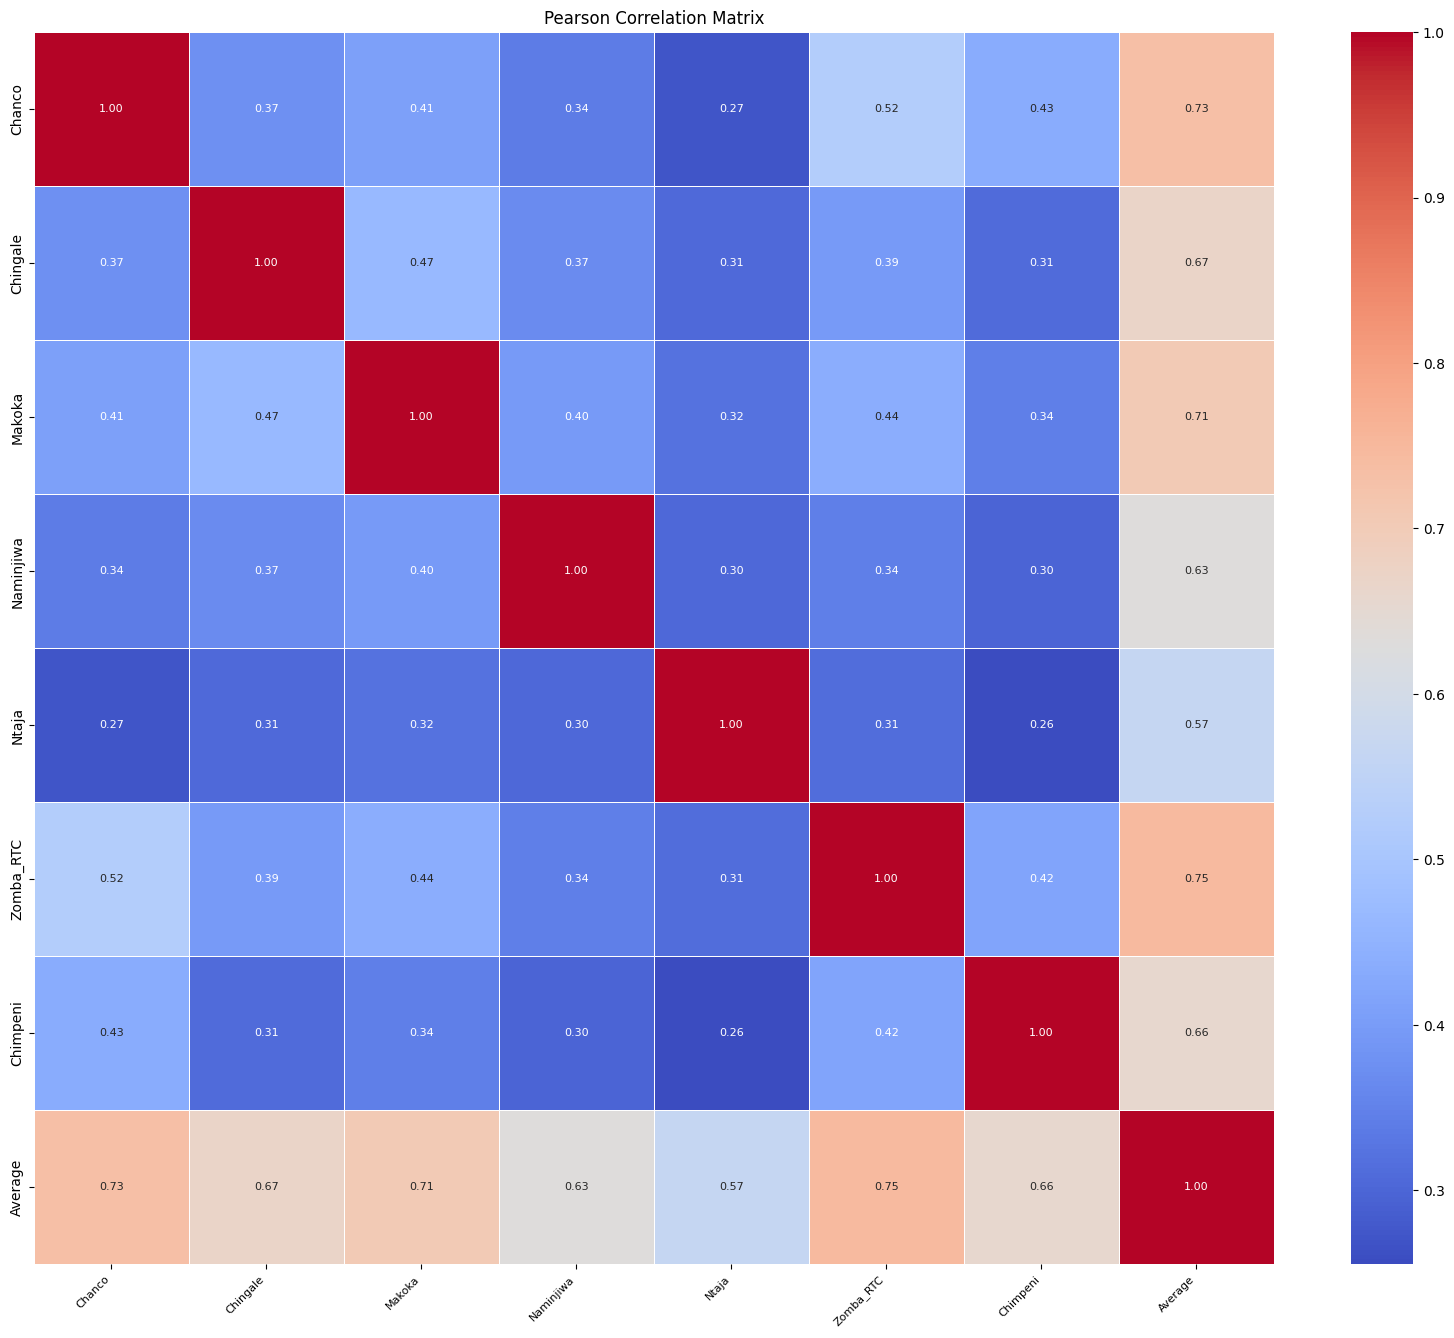

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'
# Calculate Pearson Correlation
correlation_matrix_pearson = data.corr()

# Set the figure size and annotation font size
plt.figure(figsize=(20, 16))

# Plot the Pearson correlation matrix
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, linewidths=0.5)
plt.title('Pearson Correlation Matrix', fontsize=12)

# Rotate the feature names on the x-axis
plt.xticks(rotation=45, ha='right', fontsize=8)

# Save the plot in high-quality JPG format
plt.savefig('pearson_correlation_matrix_plot.jpg', dpi=300, bbox_inches='tight')

# Save the Pearson correlation matrix as an Excel file
correlation_matrix_pearson.to_excel('pearson_correlation_matrix.xlsx')

# Show the plot
plt.show()

<ipython-input-7-f6b312e9ded1>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_spearman = data.corr(method='spearman')


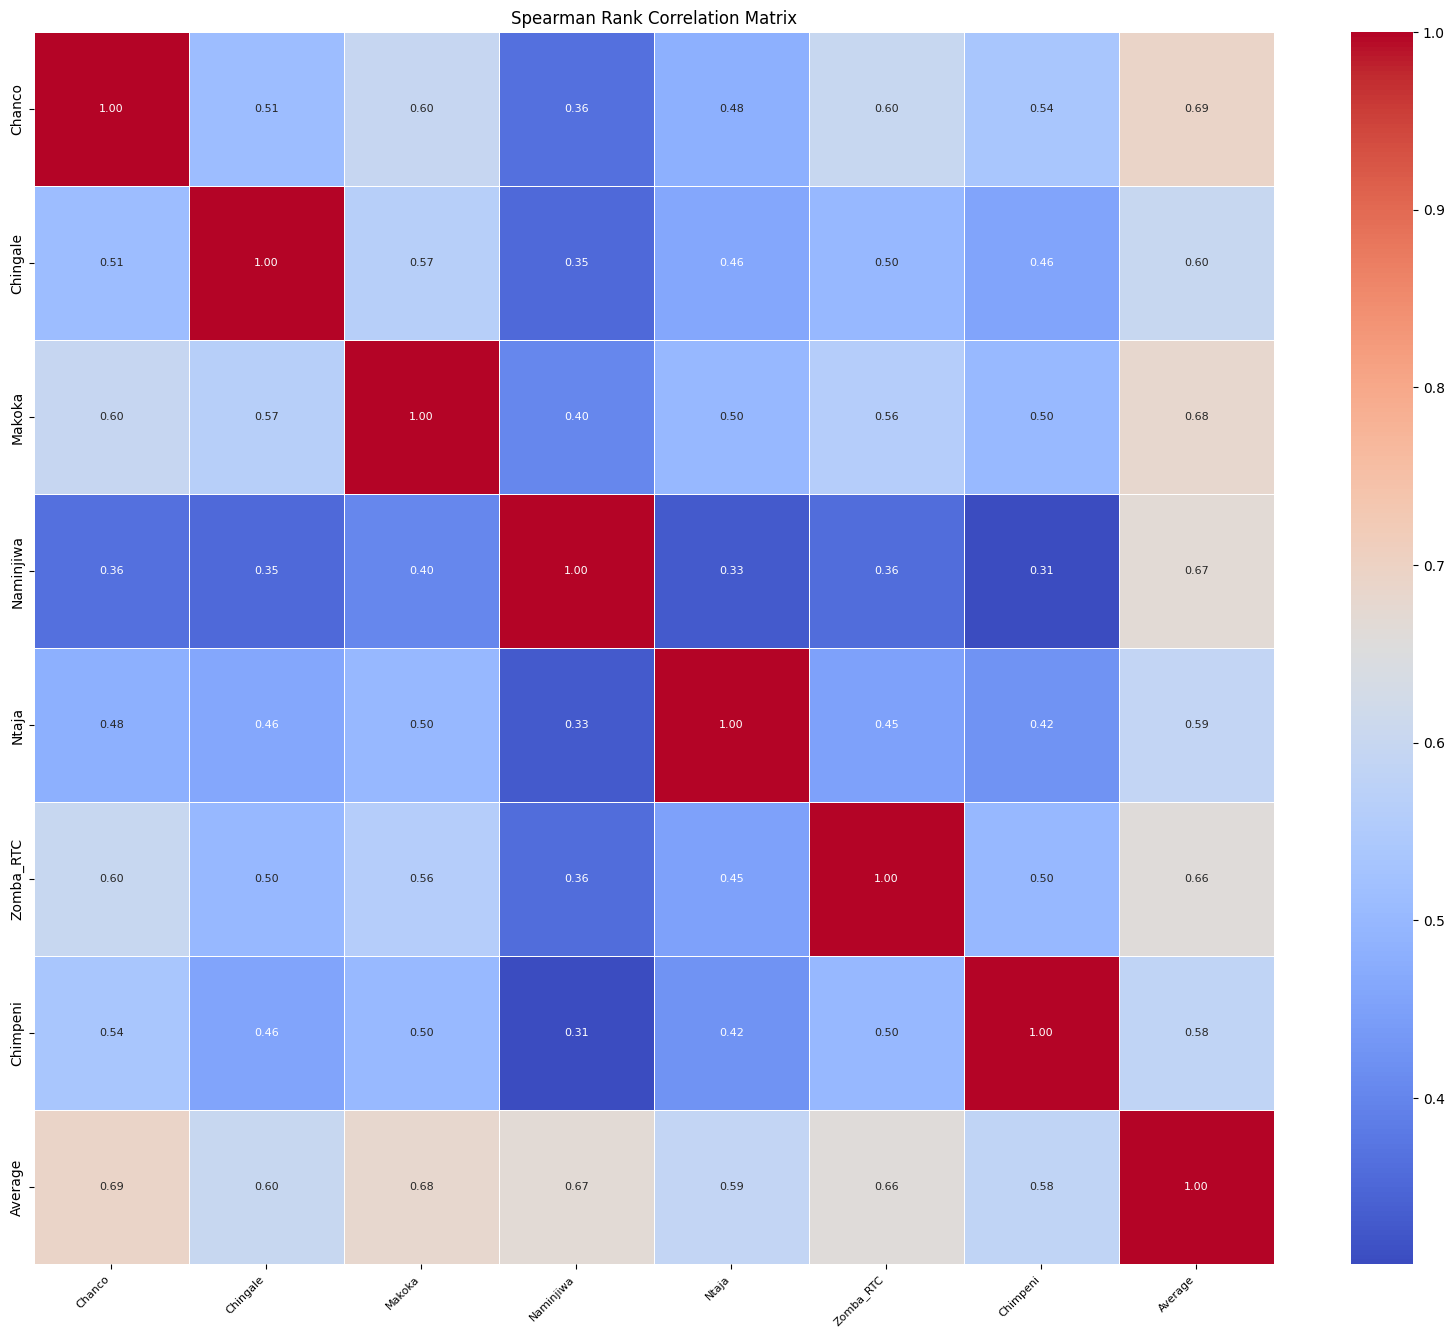

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'
# Calculate Spearman Rank Correlation
correlation_matrix_spearman = data.corr(method='spearman')

# Set the figure size and annotation font size
plt.figure(figsize=(20, 16))

# Plot the Spearman Rank Correlation Matrix
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, linewidths=0.5)
plt.title('Spearman Rank Correlation Matrix', fontsize=12)

# Rotate the feature names on the x-axis
plt.xticks(rotation=45, ha='right', fontsize=8)

# Save the plot in high-quality JPG format
plt.savefig('spearman_correlation_matrix_plot.jpg', dpi=300, bbox_inches='tight')

# Save the Spearman correlation matrix as an Excel file
correlation_matrix_spearman.to_excel('spearman_correlation_matrix.xlsx')

# Show the plot
plt.show()


<ipython-input-8-92da07862b74>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_kendall = data.corr(method='kendall')


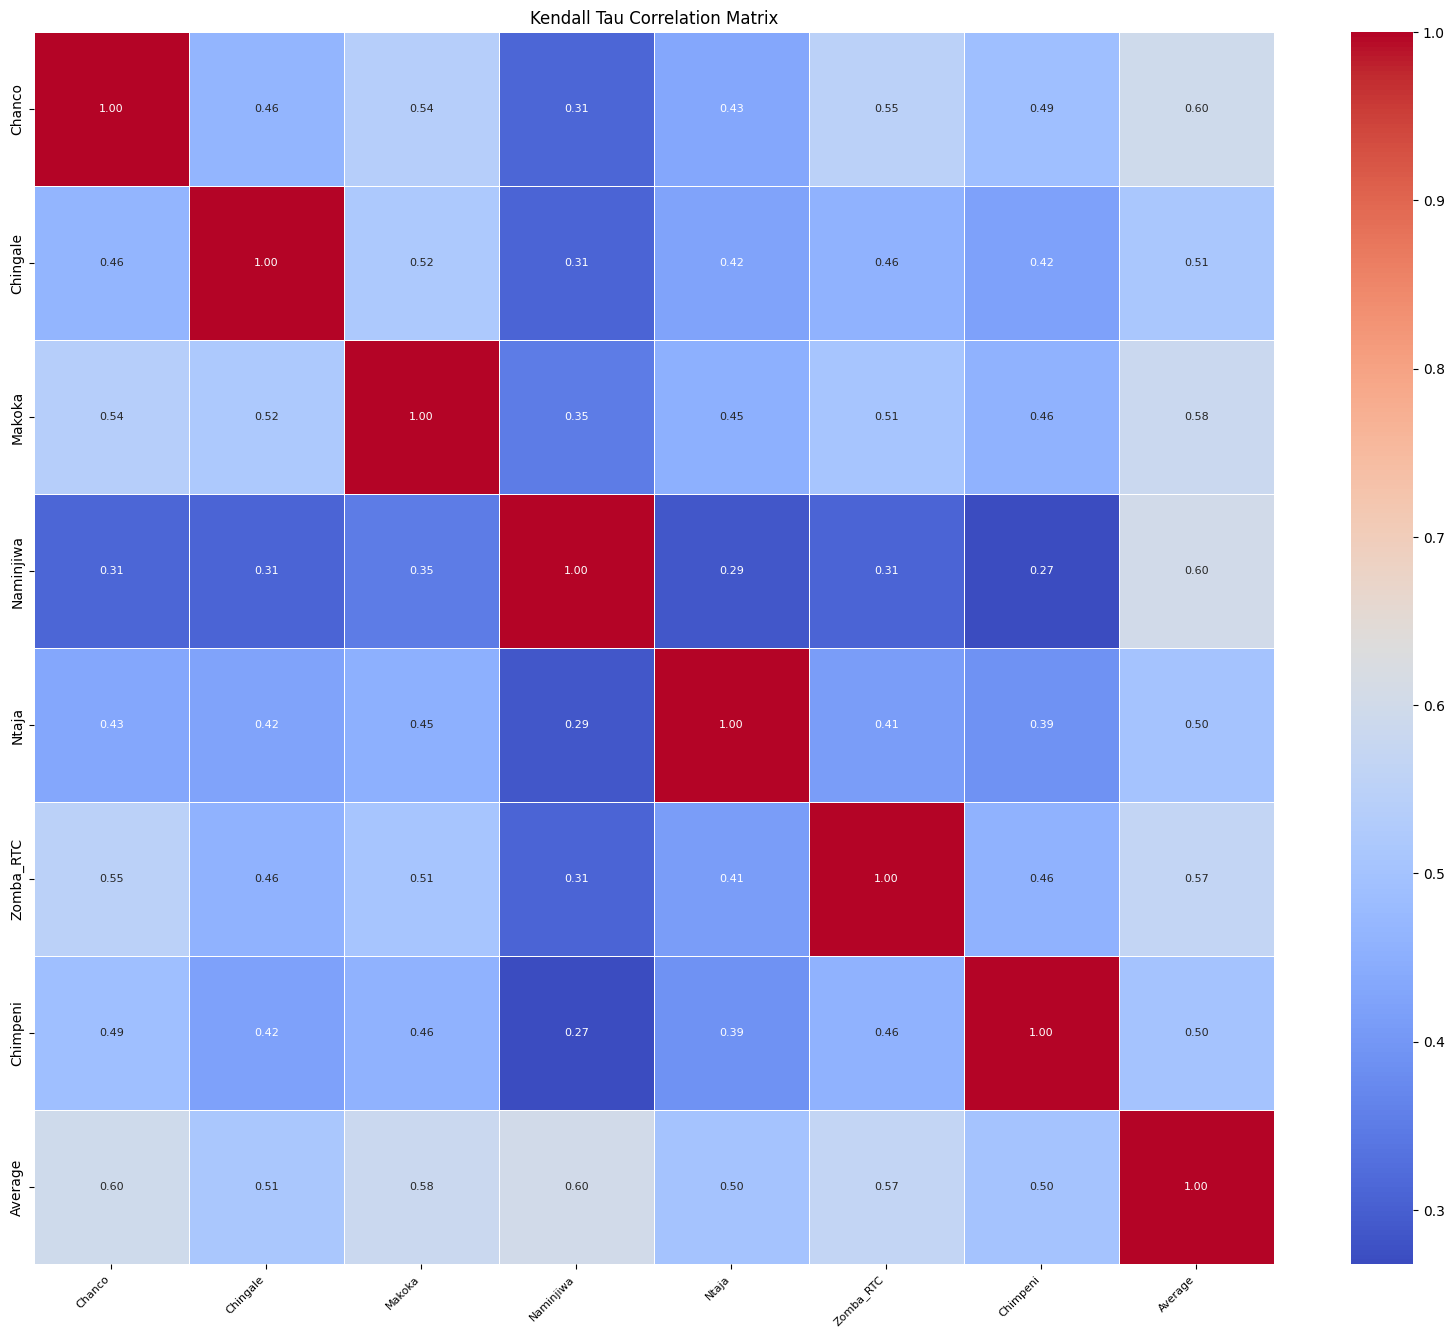

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'
# Calculate Kendall's Tau Correlation
correlation_matrix_kendall = data.corr(method='kendall')

# Set the figure size and annotation font size
plt.figure(figsize=(20, 16))

# Plot the Kendall's Tau Correlation Matrix
sns.heatmap(correlation_matrix_kendall, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, linewidths=0.5)
plt.title('Kendall Tau Correlation Matrix', fontsize=12)

# Rotate the feature names on the x-axis
plt.xticks(rotation=45, ha='right', fontsize=8)

# Save the plot in high-quality JPG format
plt.savefig("kendall_correlation_matrix_plot.jpg", dpi=300, bbox_inches='tight')

# Save the Kendall's Tau correlation matrix as an Excel file
correlation_matrix_kendall.to_excel("kendall_correlation_matrix.xlsx")

# Show the plot
plt.show()


<ipython-input-9-f788bc7f34eb>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_pearson = data_selected_features.corr()


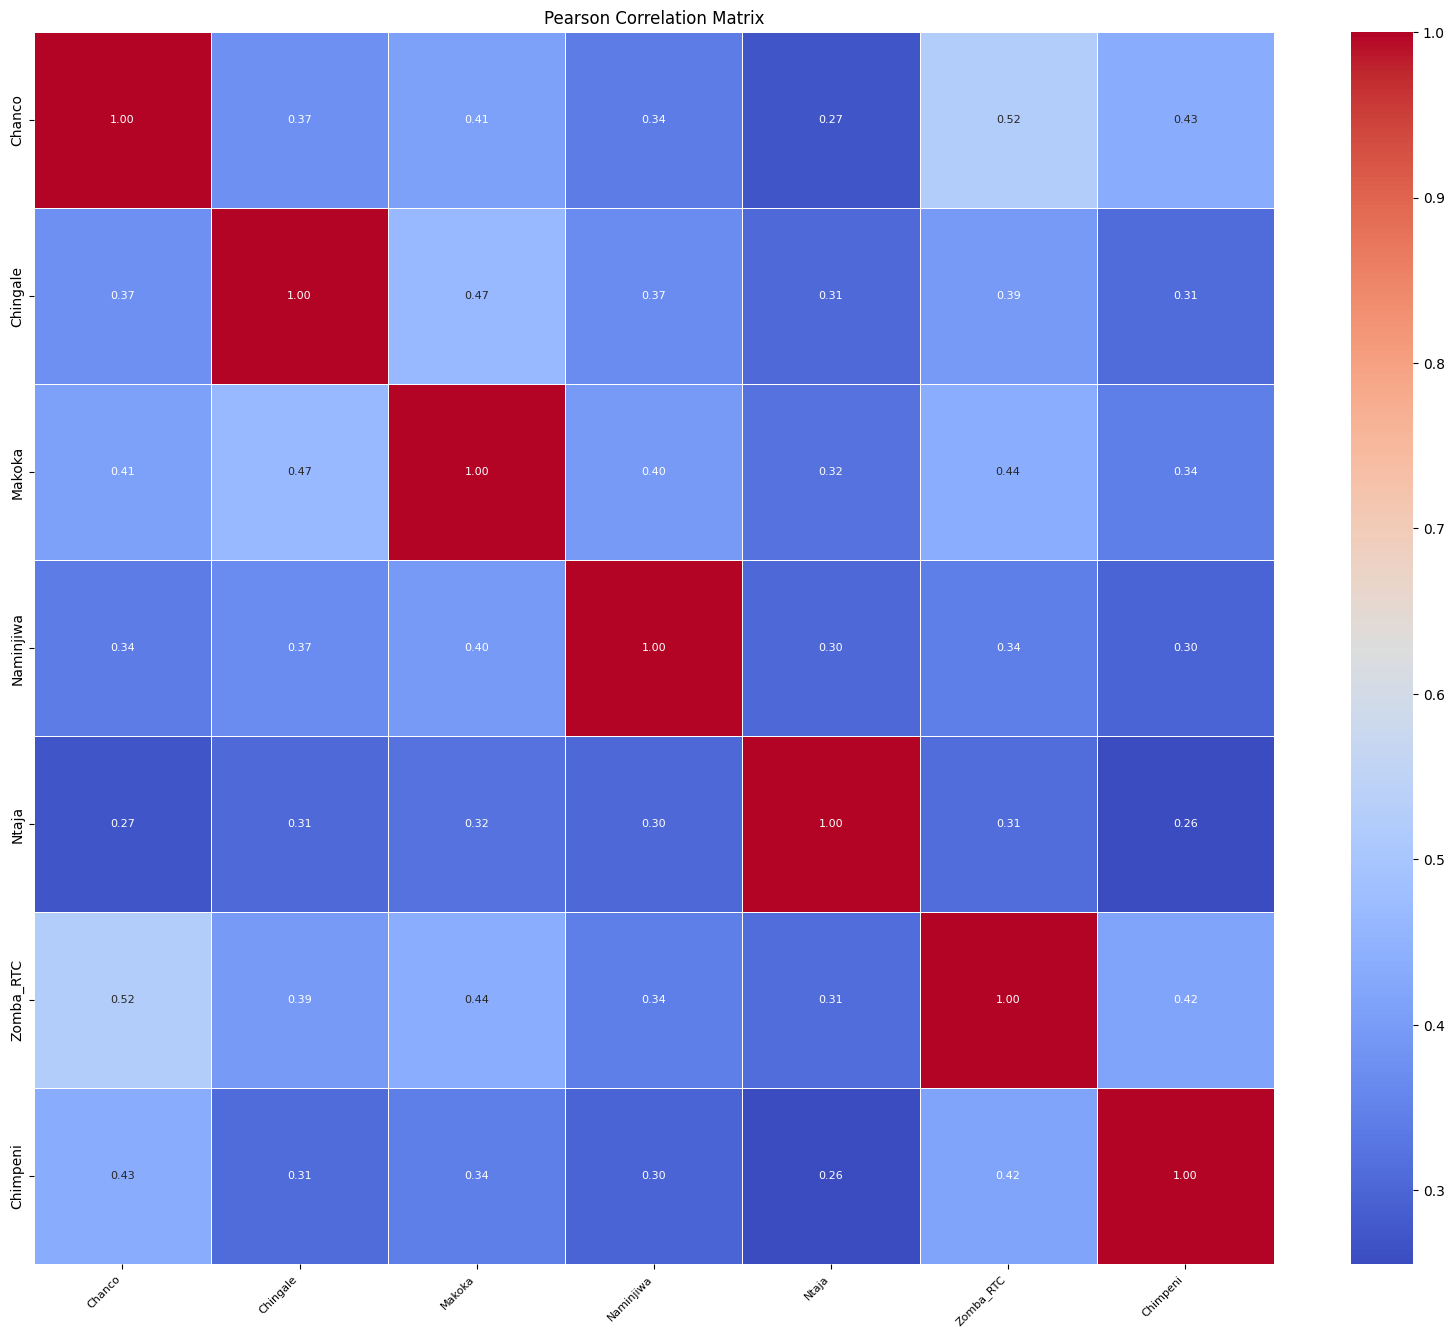

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming your DataFrame is named 'data'
selected_features = ['Date', 'Chanco', 'Chingale', 'Makoka', 'Naminjiwa', 'Ntaja', 'Zomba_RTC', 'Chimpeni']

# Filter the DataFrame to include only the selected features
data_selected_features = data[selected_features]

# Calculate Pearson Correlation
correlation_matrix_pearson = data_selected_features.corr()

# Set the figure size and annotation font size
plt.figure(figsize=(20, 16))

# Plot the Pearson Correlation Matrix
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, linewidths=0.5)
plt.title('Pearson Correlation Matrix', fontsize=12)

# Rotate the feature names on the x-axis
plt.xticks(rotation=45, ha='right', fontsize=8)

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the plot in high-quality JPG format with a timestamp in the file name
plt.savefig(f'pearson_correlation_matrix_plot_{timestamp}.jpg', dpi=300, bbox_inches='tight')

# Save the Pearson correlation matrix as an Excel file with a timestamp in the file name
correlation_matrix_pearson.to_excel(f'pearson_correlation_matrix_{timestamp}.xlsx')

# Show the plot
plt.show()


# 4.0 Analyzing Meteorological Data Subset

## 4.1 Temprature
**Can we assume that the temperature of one station represents the temperature for the entire basin?**

We have data available for the Makoka station as well as the average satellite data for the entire basin obtained from the Google Earth Engine. *italicized text*



### 4.1.1 Chart and Pairplot of Temprature
This code processes temperature data, filters it based on a specific date range and desired columns, saves a sub-dataset as an Excel file, and generates line and pair plots. The plots are saved as high-quality PNG and JPG files.

Data types: MaxTemp           float64
MinTemp           float64
MakokaMinTemp     float64
MakokaMaxTemp     float64
MakokaMeanTemp    float64
dtype: object
Data shape: (480, 5)


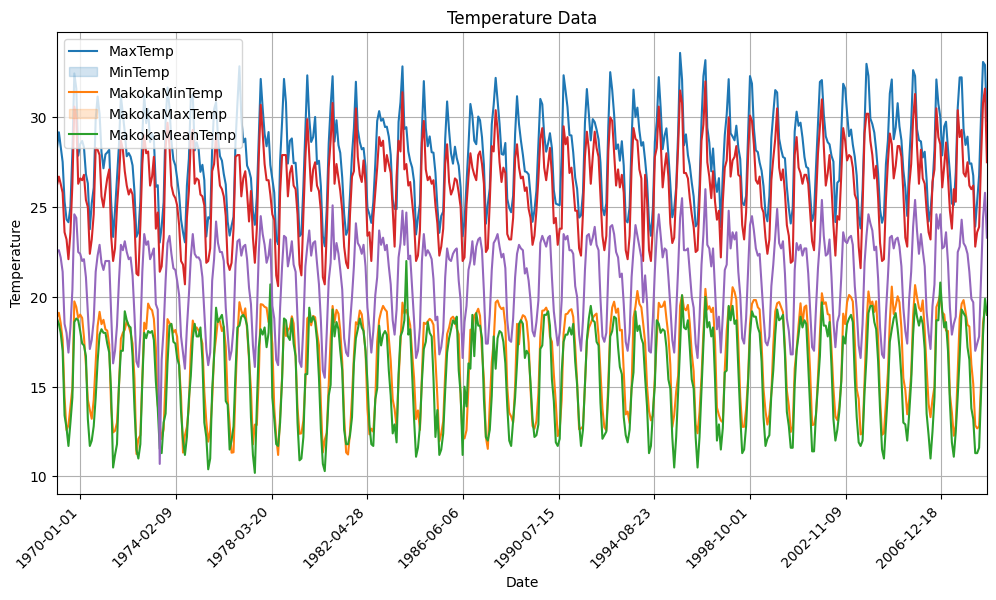

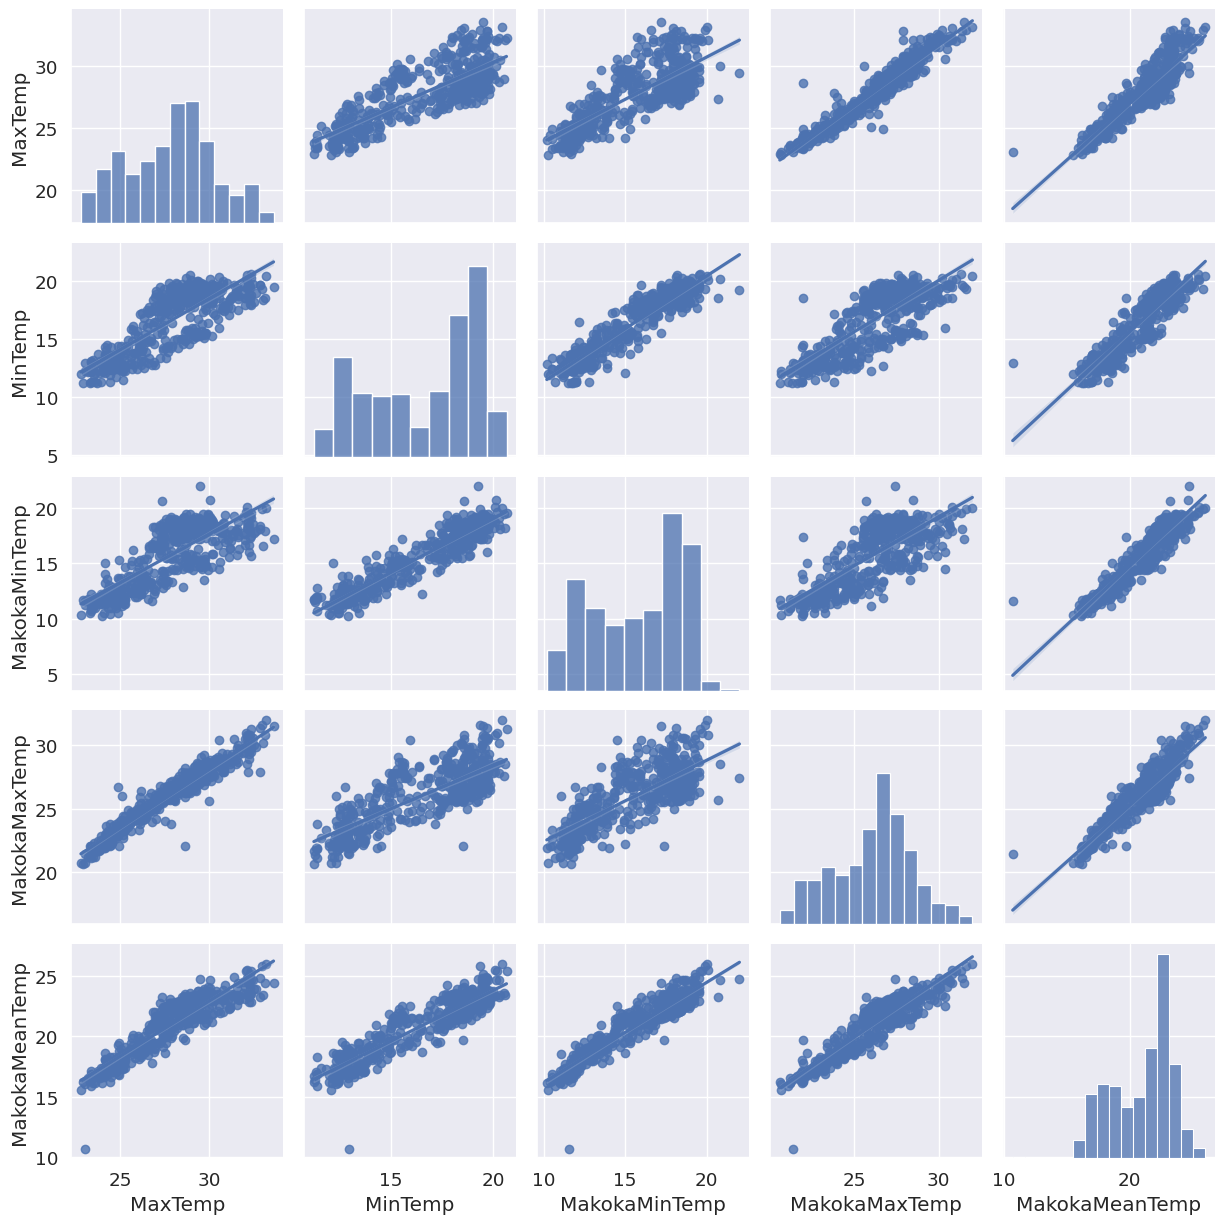

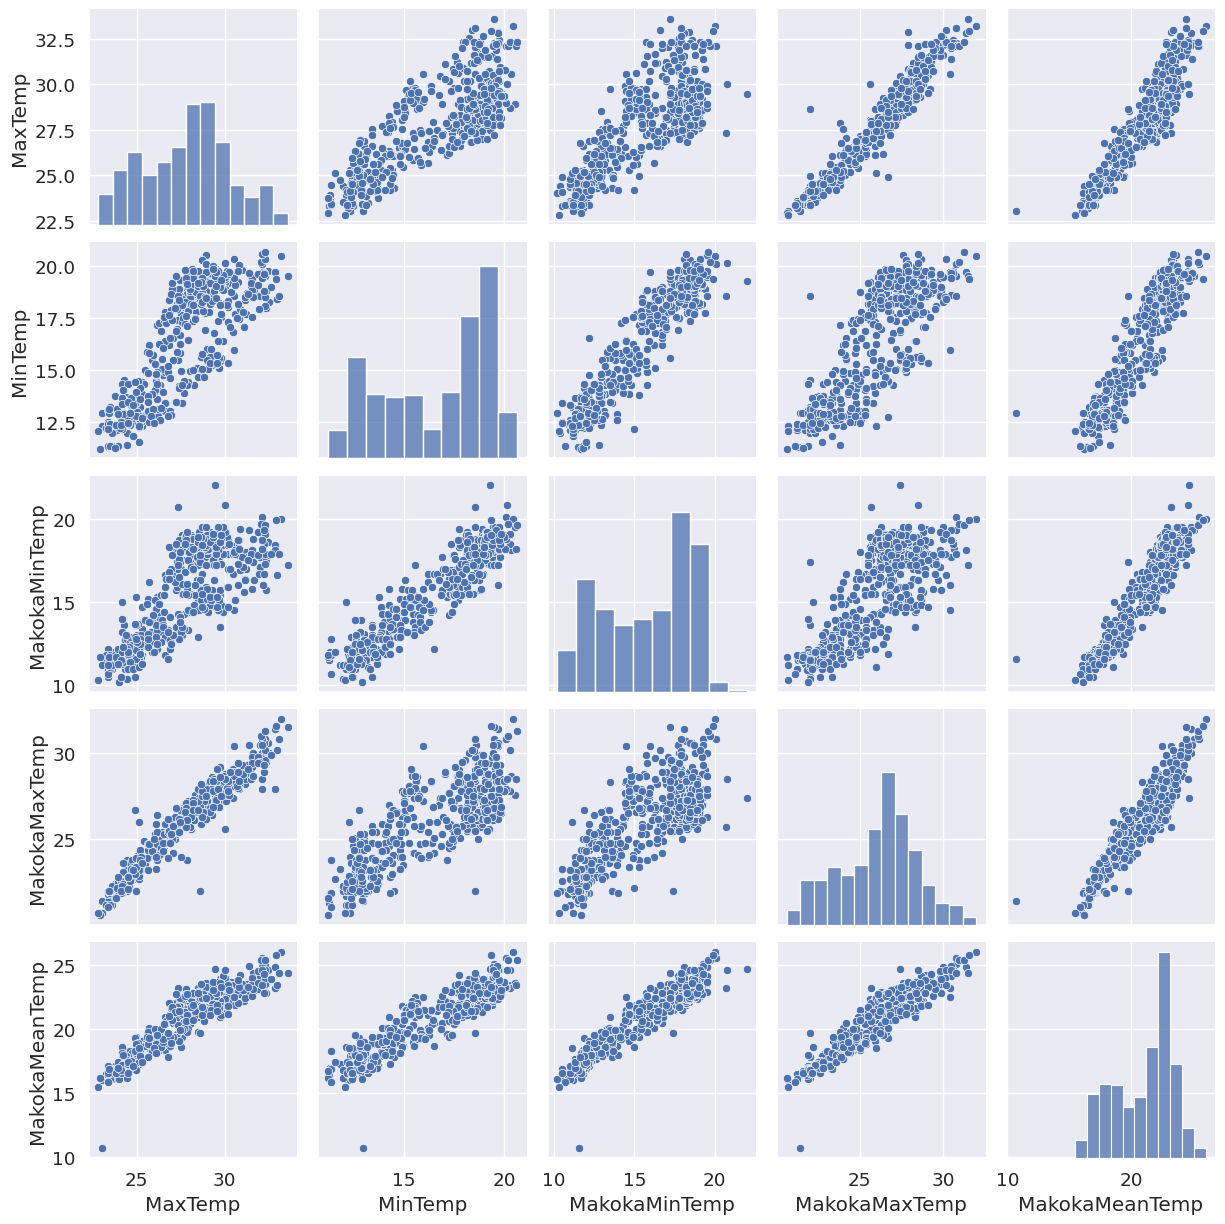

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# The dataset is called 'data'
column_names = ['Date', 'MaxTemp', 'MinTemp', 'MakokaMinTemp', 'MakokaMaxTemp', 'MakokaMeanTemp']  # Specify the desired column names
start_date = '1969-01-01'  # Specify the start date
end_date = '2008-12-01'  # Specify the end date

# Remove leading and trailing spaces from column names
column_names = [column.strip() for column in column_names]

# Filter the data based on the column names and date range
sub_dataset_temperature = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# Convert 'Date' column to datetime type
sub_dataset_temperature['Date'] = pd.to_datetime(sub_dataset_temperature['Date'])

# Set 'Date' column as the index
sub_dataset_temperature.set_index('Date', inplace=True)

# Check the type of dataset
print("Data types:", sub_dataset_temperature.dtypes)

# Check the shape of the data
print("Data shape:", sub_dataset_temperature.shape)

# Save the subdataset as an Excel file
sub_dataset_temperature.to_excel("sub_dataset_temperature.xlsx", index=True)

# Plotting the dataset
plt.figure(figsize=(12, 6))
for column in column_names[1:]:
    sns.lineplot(data=sub_dataset_temperature, x=sub_dataset_temperature.index, y=column)  # Use the index for x-axis

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Data')
plt.legend(column_names[1:])

# Add grid lines
plt.grid(True)

# Set ticks on months
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))

# Adjust the axes
plt.gca().margins(x=0)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the plot as a high-quality PNG file
plt.savefig('temperature_plot.png', dpi=300, bbox_inches='tight')

# Save the plot as a high-quality JPG file
plt.savefig('temperature_plot.jpg', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Create a pair plot with regression
sns.set(font_scale=1.2)  # Increase the font size for better legibility
pairplot_reg = sns.pairplot(sub_dataset_temperature, kind="reg")
pairplot_reg.savefig('sub_dataset_temperature_pairplot_reg.png', dpi=300, bbox_inches='tight')
pairplot_reg.savefig('sub_dataset_temperature_pairplot_reg.jpg', dpi=300, bbox_inches='tight')

# Create a pair plot without regression
sns.set(font_scale=1.2)  # Increase the font size for better legibility
pairplot_scatter = sns.pairplot(sub_dataset_temperature, kind="scatter")
pairplot_scatter.savefig('sub_dataset_temperature_pairplot_scatter.png', dpi=300, bbox_inches='tight')
pairplot_scatter.savefig('sub_dataset_temperature_pairplot_scatter.jpg', dpi=300, bbox_inches='tight')

### 4.1.2 Correlation of Temprature
This code processes temperature data, filters it based on a specific date range and desired columns, calculates the correlation matrix, saves it as an Excel file, and generates a correlation heatmap plot. The plot is saved as high-quality PNG and JPG files. Finally, the correlation matrix is displayed.



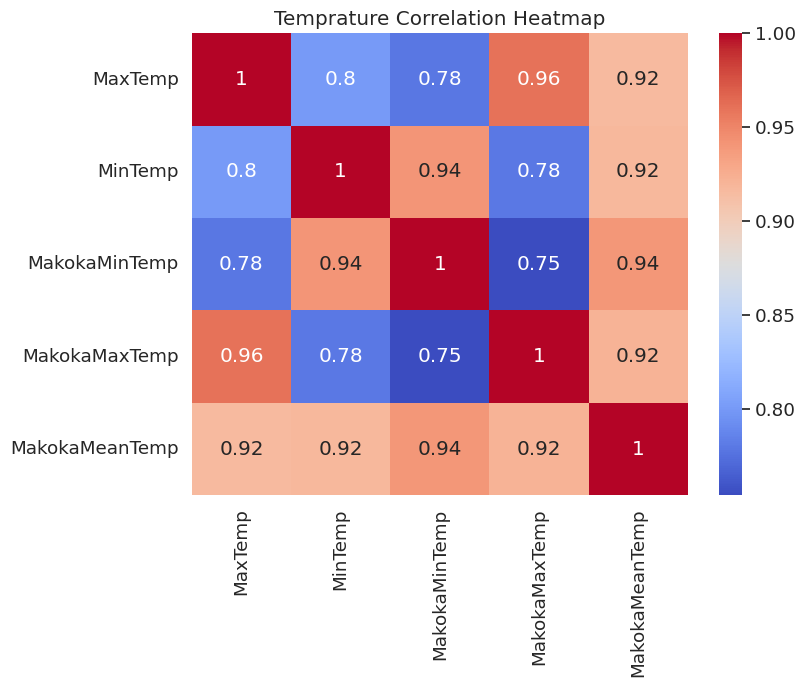

                 MaxTemp   MinTemp  MakokaMinTemp  MakokaMaxTemp  \
MaxTemp         1.000000  0.800266       0.778825       0.959633   
MinTemp         0.800266  1.000000       0.941167       0.779134   
MakokaMinTemp   0.778825  0.941167       1.000000       0.753927   
MakokaMaxTemp   0.959633  0.779134       0.753927       1.000000   
MakokaMeanTemp  0.915790  0.917946       0.939768       0.921280   

                MakokaMeanTemp  
MaxTemp               0.915790  
MinTemp               0.917946  
MakokaMinTemp         0.939768  
MakokaMaxTemp         0.921280  
MakokaMeanTemp        1.000000  


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# The dataset is called 'data'
column_names = ['Date', 'MaxTemp', 'MinTemp', 'MakokaMinTemp', 'MakokaMaxTemp', 'MakokaMeanTemp']  # Specify the desired column names
start_date = '1969-01-01'  # Specify the start date
end_date = '2008-12-01'  # Specify the end date

# Remove leading and trailing spaces from column names
column_names = [column.strip() for column in column_names]

# Filter the data based on the column names and date range
sub_dataset_temperature = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# Set 'Date' column as the index
sub_dataset_temperature.set_index('Date', inplace=True)

# Calculate the correlation matrix
temprature_correlation_matrix = sub_dataset_temperature.corr()

# Save the correlation matrix as an Excel file
temprature_correlation_matrix.to_excel('temprature_correlation_matrix.xlsx')

# Create a correlation heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(temprature_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Temprature Correlation Heatmap')
plt.savefig('temprature_correlation_plot.jpg', dpi=300, bbox_inches='tight')
plt.savefig('temprature_correlation_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Display the correlation matrix
print(temprature_correlation_matrix)

------------------------------------------------------------------



### 4.1.3 Temperature Correlation Analysis and Visualization

This code analyzes temperature data by performing correlation analysis and generating visualizations. It filters the data based on a date range, calculates correlations using the Spearman method, creates correlation tables, and generates scatter plots and heatmaps. The results are saved in meaningful file names for easy identification and further analysis.

<ipython-input-11-ebab81705744>:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Category': category, 'Range': range_label, 'Mean ' + column1: subset1.mean(), 'Mean ' + column2: subset2.mean()}, ignore_index=True)
<ipython-input-11-ebab81705744>:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Category': category, 'Range': range_label, 'Mean ' + column1: subset1.mean(), 'Mean ' + column2: subset2.mean()}, ignore_index=True)
<ipython-input-11-ebab81705744>:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Category': category, 'Range': range_label, 'Mean ' + column1: subset1.mean(), 'Mean ' + column2: subset2.mean()}, ignore_index=True)
<ipython-input-11-e

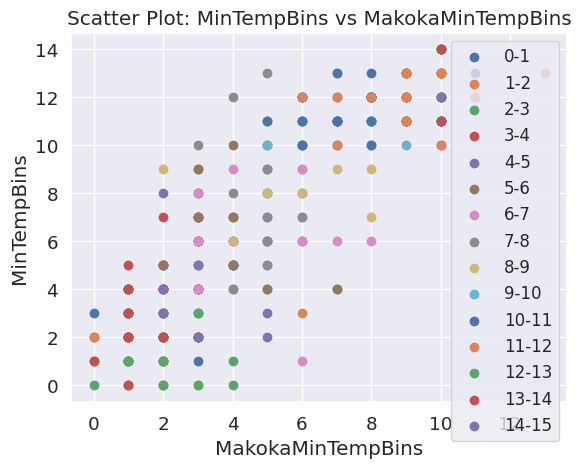

<ipython-input-11-ebab81705744>:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Category': category, 'Range': range_label, 'Mean ' + column1: subset1.mean(), 'Mean ' + column2: subset2.mean()}, ignore_index=True)
<ipython-input-11-ebab81705744>:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Category': category, 'Range': range_label, 'Mean ' + column1: subset1.mean(), 'Mean ' + column2: subset2.mean()}, ignore_index=True)
<ipython-input-11-ebab81705744>:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Category': category, 'Range': range_label, 'Mean ' + column1: subset1.mean(), 'Mean ' + column2: subset2.mean()}, ignore_index=True)
<ipython-input-11-e

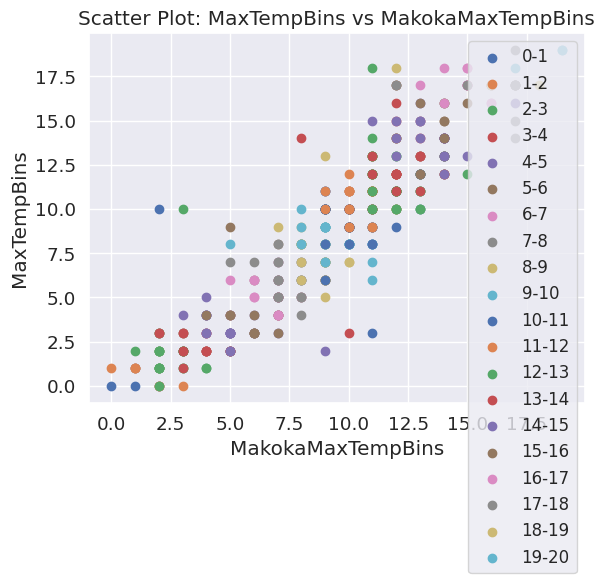

Correlation Table for 'MinTemp' and 'MakokaMinTemp':
   Category  Range  Mean MinTempBins  Mean MakokaMinTempBins
0         0    0-1          1.500000                1.250000
1         1    1-2          1.291667                1.666667
2         2    2-3          1.886364                2.409091
3         3    3-4          1.925926                3.370370
4         4    4-5          3.565217                4.913043
5         5    5-6          3.909091                6.500000
6         6    6-7          5.222222                7.592593
7         7    7-8          5.333333                9.111111
8         8    8-9          5.909091                8.727273
9         9   9-10          7.250000               11.041667
10       10  10-11          8.315789               11.578947
11       11  11-12          9.368421               12.394737
12       12  12-13         10.000000               13.500000
13       13  13-14         10.000000               12.500000
14       14  14-15         10.00

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# The dataset is called 'data'
column_names = ['Date', 'MaxTemp', 'MinTemp', 'MakokaMinTemp', 'MakokaMaxTemp', 'MakokaMeanTemp']  # Specify the desired column names
start_date = '1969-01-01'  # Specify the start date
end_date = '2008-12-01'  # Specify the end date
bin_sizes = [5, 10, 15, 20]  # Specify the bin sizes to test

# Filter the data based on the column names and date range
sub_dataset_temperature = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# Convert 'Date' column to datetime type
sub_dataset_temperature['Date'] = pd.to_datetime(sub_dataset_temperature['Date'])

# Set 'Date' column as the index
sub_dataset_temperature.set_index('Date', inplace=True)

correlation_table = pd.DataFrame(index=bin_sizes, columns=['MaxTemp', 'MinTemp'])

for bin_size in bin_sizes:
    # Create categorical bins for 'MaxTemp' and 'MakokaMaxTemp' columns
    sub_dataset_temperature['MaxTempBins'] = pd.cut(sub_dataset_temperature['MaxTemp'], bins=bin_size, labels=False)
    sub_dataset_temperature['MakokaMaxTempBins'] = pd.cut(sub_dataset_temperature['MakokaMaxTemp'], bins=bin_size, labels=False)

    # Calculate the correlation between the bins using the 'spearman' method
    correlation, _ = spearmanr(sub_dataset_temperature['MaxTempBins'], sub_dataset_temperature['MakokaMaxTempBins'])
    correlation_table.loc[bin_size, 'MaxTemp'] = correlation

    # Create categorical bins for 'MinTemp' and 'MakokaMinTemp' columns
    sub_dataset_temperature['MinTempBins'] = pd.cut(sub_dataset_temperature['MinTemp'], bins=bin_size, labels=False)
    sub_dataset_temperature['MakokaMinTempBins'] = pd.cut(sub_dataset_temperature['MakokaMinTemp'], bins=bin_size, labels=False)

    # Calculate the correlation between the bins using the 'spearman' method
    correlation, _ = spearmanr(sub_dataset_temperature['MinTempBins'], sub_dataset_temperature['MakokaMinTempBins'])
    correlation_table.loc[bin_size, 'MinTemp'] = correlation

# Save the correlation table as an Excel file
correlation_table.to_excel('correlation_table_temperature_bins.xlsx')

# Find the bin size with the highest correlation for MaxTemp
best_bin_size_maxtemp = correlation_table['MaxTemp'].astype(float).idxmax()

# Create categorical bins for 'MaxTemp' and 'MakokaMaxTemp' using the best bin size
sub_dataset_temperature['MaxTempBins'] = pd.cut(sub_dataset_temperature['MaxTemp'], bins=best_bin_size_maxtemp, labels=False)
sub_dataset_temperature['MakokaMaxTempBins'] = pd.cut(sub_dataset_temperature['MakokaMaxTemp'], bins=best_bin_size_maxtemp, labels=False)

# Find the bin size with the highest correlation for MinTemp
best_bin_size_mintemp = correlation_table['MinTemp'].astype(float).idxmax()

# Create categorical bins for 'MinTemp' and 'MakokaMinTemp' using the best bin size
sub_dataset_temperature['MinTempBins'] = pd.cut(sub_dataset_temperature['MinTemp'], bins=best_bin_size_mintemp, labels=False)
sub_dataset_temperature['MakokaMinTempBins'] = pd.cut(sub_dataset_temperature['MakokaMinTemp'], bins=best_bin_size_mintemp, labels=False)

# Specify the function to create correlation table with ranges
def create_correlation_table(data, column1, column2):
    table = pd.DataFrame(columns=['Category', 'Range', 'Mean ' + column1, 'Mean ' + column2])

    unique_categories = sorted(data[column1].dropna().unique())

    for category in unique_categories:
        subset1 = data[data[column1] == category][column2].dropna()
        subset2 = data[data[column2] == category][column1].dropna()

        # Ensure subsets have the same size
        min_size = min(len(subset1), len(subset2))
        subset1 = subset1[:min_size]
        subset2 = subset2[:min_size]

        range_label = f'{category}-{category + 1}'  # Range label in format (x-y)
        table = table.append({'Category': category, 'Range': range_label, 'Mean ' + column1: subset1.mean(), 'Mean ' + column2: subset2.mean()}, ignore_index=True)

        # Scatter plot with range label
        plt.scatter(subset1, subset2, label=range_label)

    plt.xlabel(column2)
    plt.ylabel(column1)
    plt.title('Scatter Plot: ' + column1 + ' vs ' + column2)
    plt.legend(fontsize='smaller')  # Reduce the font size of the legend even further
    plt.savefig('correlation_bins_temperature.jpg', dpi=300, bbox_inches='tight')  # Save the plot as a high-quality JPG image
    plt.savefig('correlation_bins_temperature.png', dpi=300, bbox_inches='tight')  # Save the plot as a high-quality PNG image

    plt.show()

    return table


# Create the correlation table for 'MinTemp' and 'MakokaMinTemp'
min_temp_makoka_min_temp_table = create_correlation_table(sub_dataset_temperature, 'MinTempBins', 'MakokaMinTempBins')

# Create the correlation table for 'MaxTemp' and 'MakokaMaxTemp'
max_temp_makoka_max_temp_table = create_correlation_table(sub_dataset_temperature, 'MaxTempBins', 'MakokaMaxTempBins')

# Display the tables
print("Correlation Table for 'MinTemp' and 'MakokaMinTemp':")
print(min_temp_makoka_min_temp_table)
print("\nCorrelation Table for 'MaxTemp' and 'MakokaMaxTemp':")
print(max_temp_makoka_max_temp_table)

# Save the correlation tables as Excel files
min_temp_makoka_min_temp_table.to_excel('temperature_min_temp_makoka_min_temp_table.xlsx', index=False)
max_temp_makoka_max_temp_table.to_excel('temperature_max_temp_makoka_max_temp_table.xlsx', index=False)

### 4.1.4 Decision Tree Regression for Temperature Prediction

This code performs decision tree regression to predict temperatures using the MaxTemp and MinTemp features. The dataset is filtered and missing values are removed. The data is then split into training and testing sets. A decision tree regressor is trained on the training data and used to predict temperatures on the testing data. Model performance metrics, including mean squared error, root mean squared error, and R-squared, are calculated. The decision tree is visualized and saved as an image. The generated rules are saved as Python and AnyLogic functions. Finally, the metric analysis and classification report are printed.

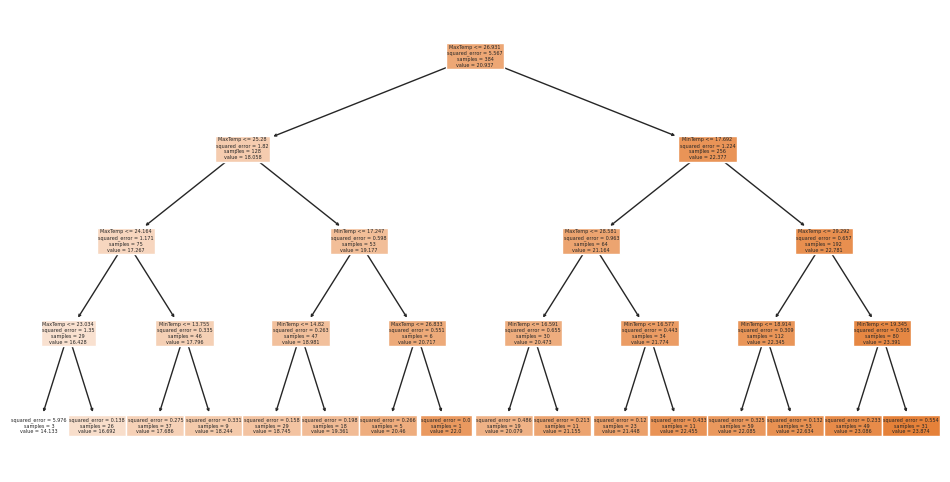

Metric Analysis:
                    Metric     Value
0       Mean Squared Error  0.585505
1  Root Mean Squared Error  0.765183
2                R-squared  0.917379

Classification Report:
            Predicted Temperature  Actual Temperature
Year Month                                           
1975 2                  22.084746                22.2
2003 7                  16.692308                16.6
2001 11                 23.874194                25.4
1992 2                  23.085714                23.9
2002 4                  21.154545                21.1
...                           ...                 ...
1987 7                  17.686486                17.4
1988 10                 23.085714                22.4
2003 1                  22.633962                23.3
1971 2                  22.084746                22.0
2003 12                 23.874194                24.1

[96 rows x 2 columns]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_iris
import graphviz

# The dataset is called 'data'
column_names = ['Date', 'MaxTemp', 'MinTemp', 'MakokaMinTemp', 'MakokaMaxTemp', 'MakokaMeanTemp']  # Specify the desired column names
start_date = '1969-01-01'  # Specify the start date
end_date = '2008-12-01'  # Specify the end date

# Filter the data based on the column names and date range
sub_dataset_temperature = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# Drop rows with missing values
sub_dataset_temperature.dropna(inplace=True)

# Extract the features (temperature columns)
features = sub_dataset_temperature[['MaxTemp', 'MinTemp']]

# Extract the target variable (class or label)
target = sub_dataset_temperature['MakokaMeanTemp']

# Check the number of available samples
num_samples = len(features)

if num_samples == 0:
    print("Insufficient samples after dropping missing values.")
else:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Create a decision tree regressor with max_depth=4 and criterion='squared_error'
    clf = DecisionTreeRegressor(max_depth=4, criterion='squared_error')

    # Fit the regressor to the training data
    clf.fit(X_train, y_train)

    # Visualize the decision tree using plot_tree
    plt.figure(figsize=(12, 6))
    plot_tree(clf, feature_names=['MaxTemp', 'MinTemp'], filled=True)
    plt.savefig('decision_tree_temperature.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Generate rules as Python function code
    rules = export_text(clf, feature_names=['MaxTemp', 'MinTemp'])
    rules_text = "def predict_temperature(MaxTemp, MinTemp):\n"
    rules_text += "\t# Decision Rules:\n"
    rules_text += rules.replace("|---", "if").replace("|", "\t").replace(":", ":")

    # Save rules as Python function code in a text file
    with open('temperature_rules_python.txt', 'w') as file:
        file.write(rules_text)

    # Generate a function for AnyLogic
    anylogic_function = f"double predictTemperature(double MaxTemp, double MinTemp) {{\n"
    anylogic_function += "\t// Decision Rules:\n"
    anylogic_function += rules.replace("|---", "if").replace("|", "\t\t").replace(":", "{ return ").replace("<= ", "<=").replace("> ", ">").replace(" class:", "; }")

    # Save the AnyLogic function in a text file
    with open('temperature_rules_anylogic.txt', 'w') as file:
        file.write(anylogic_function)

    # Make predictions on the testing set
    y_pred = clf.predict(X_test)

    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Create a table of metrics
    metric_table = pd.DataFrame({'Metric': ['Mean Squared Error', 'Root Mean Squared Error', 'R-squared'],
                                 'Value': [mse, rmse, r2]})

    # Save the metric table as Excel
    metric_table.to_excel('metric_table_temperature.xlsx', index=False)

    # Create a classification report (considering it as a regression problem)
    classification_report = pd.DataFrame({'Predicted Temperature': y_pred, 'Actual Temperature': y_test})

    # Save the classification report as Excel
    classification_report.to_excel('classification_report_temperature.xlsx')

    # Output
    print("Metric Analysis:")
    print(metric_table)
    print("\nClassification Report:")
    print(classification_report)

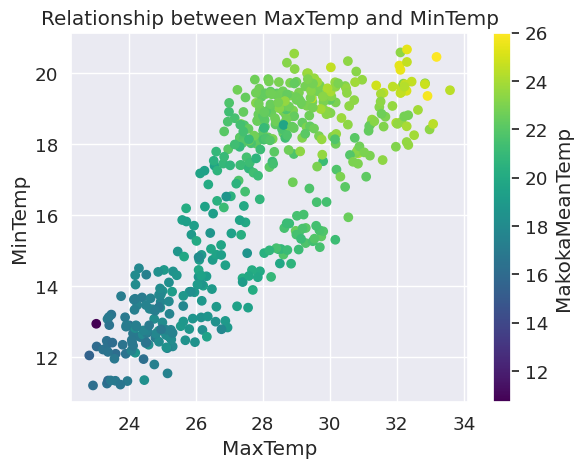

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the input and target variables
# The dataset is called 'data'
column_names = ['Date', 'MaxTemp', 'MinTemp', 'MakokaMinTemp', 'MakokaMaxTemp', 'MakokaMeanTemp']  # Specify the desired column names
start_date = '1969-01-01'  # Specify the start date
end_date = '2008-12-01'  # Specify the end date

# Filter the data based on the column names and date range
sub_dataset_temperature = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]
X = sub_dataset_temperature[['MaxTemp', 'MinTemp']]
y = sub_dataset_temperature['MakokaMeanTemp']

# Create a scatter plot
plt.scatter(X['MaxTemp'], X['MinTemp'], c=y, cmap='viridis')
plt.colorbar(label='MakokaMeanTemp')
plt.xlabel('MaxTemp')
plt.ylabel('MinTemp')
plt.title('Relationship between MaxTemp and MinTemp')
plt.show()

## 4.2 Rainfall
**Can we assume that the rainfall of one station represents the rainfall for the entire basin?**

We have data available for the Makoka station as well as the average satellite data for the entire basin obtained from the Google Earth Engine.

### 4.2.1 Chart and Pairplot of Rainfall
This code processes **rainfall** data, filters it based on a specific date range and desired columns, saves a sub-dataset as an Excel file, and generates line and pair plots. The plots are saved as high-quality PNG and JPG files.

**Rainfall start_date = '5/1/1974' end_date = '12/1/1987'**

Data types:
 Chanco       float64
Chingale     float64
Makoka       float64
Naminjiwa    float64
Ntaja        float64
Zomba_RTC    float64
Chimpeni     float64
Average      float64
dtype: object

Data shape: (13879, 8)


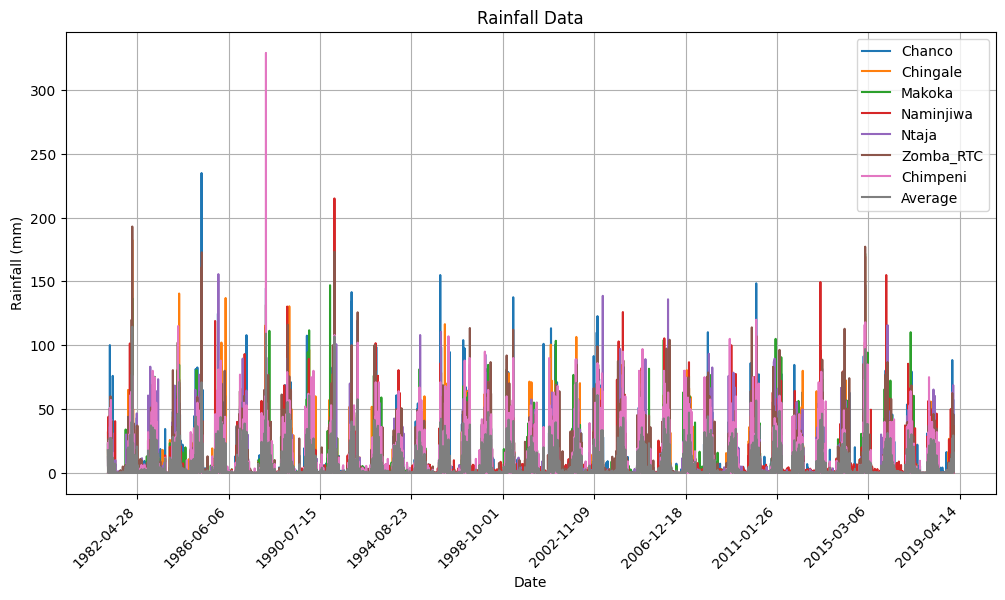

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7e9ab50d9480> (for post_execute):


KeyboardInterrupt: ignored

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# The dataset is called 'data'
column_names = ['Date', 'Chanco', 'Chingale', 'Makoka', 'Naminjiwa', 'Ntaja', 'Zomba_RTC', 'Chimpeni', 'Average']
start_date = '1/1/1981'  # Specify the start date
end_date = '12/31/2018'  # Specify the end date

# Remove leading and trailing spaces from column names
column_names = [column.strip() for column in column_names]

# Filter the data based on the column names and date range
sub_dataset_rainfall_1 = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# Convert 'Date' column to datetime type
sub_dataset_rainfall_1['Date'] = pd.to_datetime(sub_dataset_rainfall_1['Date'])

# Set 'Date' column as the index
sub_dataset_rainfall_1.set_index('Date', inplace=True)

# Check the type of dataset
print("Data types:\n", sub_dataset_rainfall_1.dtypes)

# Check the shape of the data
print("\nData shape:", sub_dataset_rainfall_1.shape)

# Save the subdataset as an Excel file
sub_dataset_rainfall_1.to_excel("sub_dataset_rainfall_1.xlsx", index=True)

# Plotting the dataset
plt.figure(figsize=(12, 6))
for i, column in enumerate(column_names[1:]):
    sns.lineplot(data=sub_dataset_rainfall_1[column], label=column)  # Use the column as the data

plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Data')
plt.legend()

# Add grid lines
plt.grid(True)

# Set ticks on months
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the plot as a high-quality PNG file
plt.savefig('rainfall_plot_1.png', dpi=300, bbox_inches='tight')

# Save the plot as a high-quality JPG file
plt.savefig('rainfall_plot_1.jpg', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Create a pair plot with regression
sns.set(font_scale=1.2)  # Increase the font size for better legibility
pairplot_reg = sns.pairplot(sub_dataset_rainfall_1, kind="reg")
pairplot_reg.savefig('sub_dataset_rainfall_1_pairplot_reg.png', dpi=300, bbox_inches='tight')
pairplot_reg.savefig('sub_dataset_rainfall_1_pairplot_reg.jpg', dpi=300, bbox_inches='tight')

# Create a pair plot without regression
sns.set(font_scale=1.2)  # Increase the font size for better legibility
pairplot_scatter = sns.pairplot(sub_dataset_rainfall_1, kind="scatter")
pairplot_scatter.savefig('sub_dataset_rainfall_1_pairplot_scatter.png', dpi=300, bbox_inches='tight')
pairplot_scatter.savefig('sub_dataset_rainfall_1_pairplot_scatter.jpg', dpi=300, bbox_inches='tight')


**Rainfall start_date = '1/1/2000' end_date = '4/1/2006**

Data types: Chanco       float64
Chingale     float64
Makoka       float64
Naminjiwa    float64
Ntaja        float64
Zomba_RTC    float64
Chimpeni     float64
Average      float64
dtype: object
Data shape: (13879, 8)


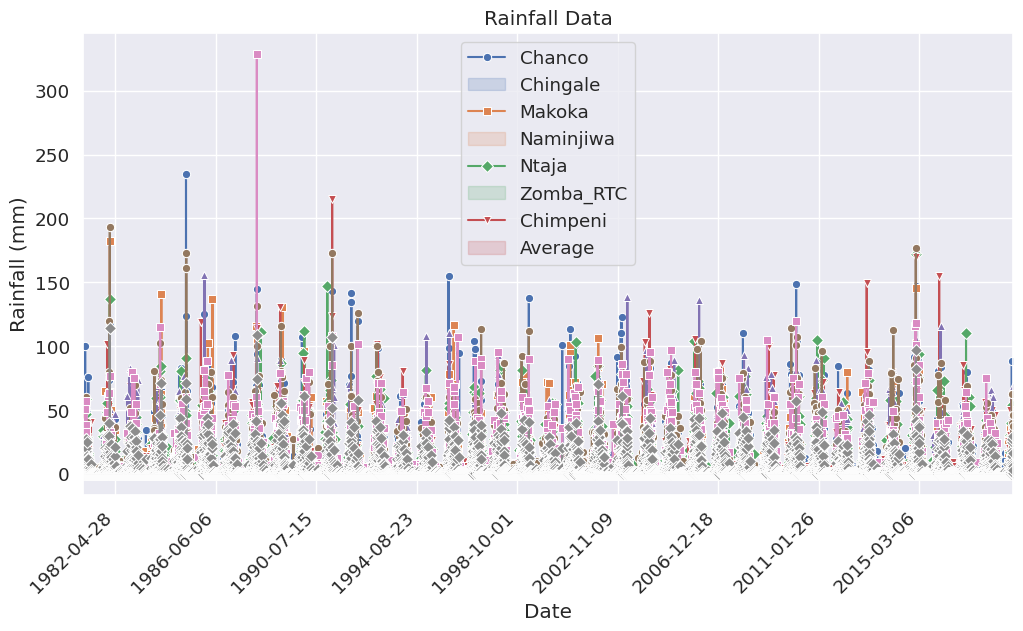

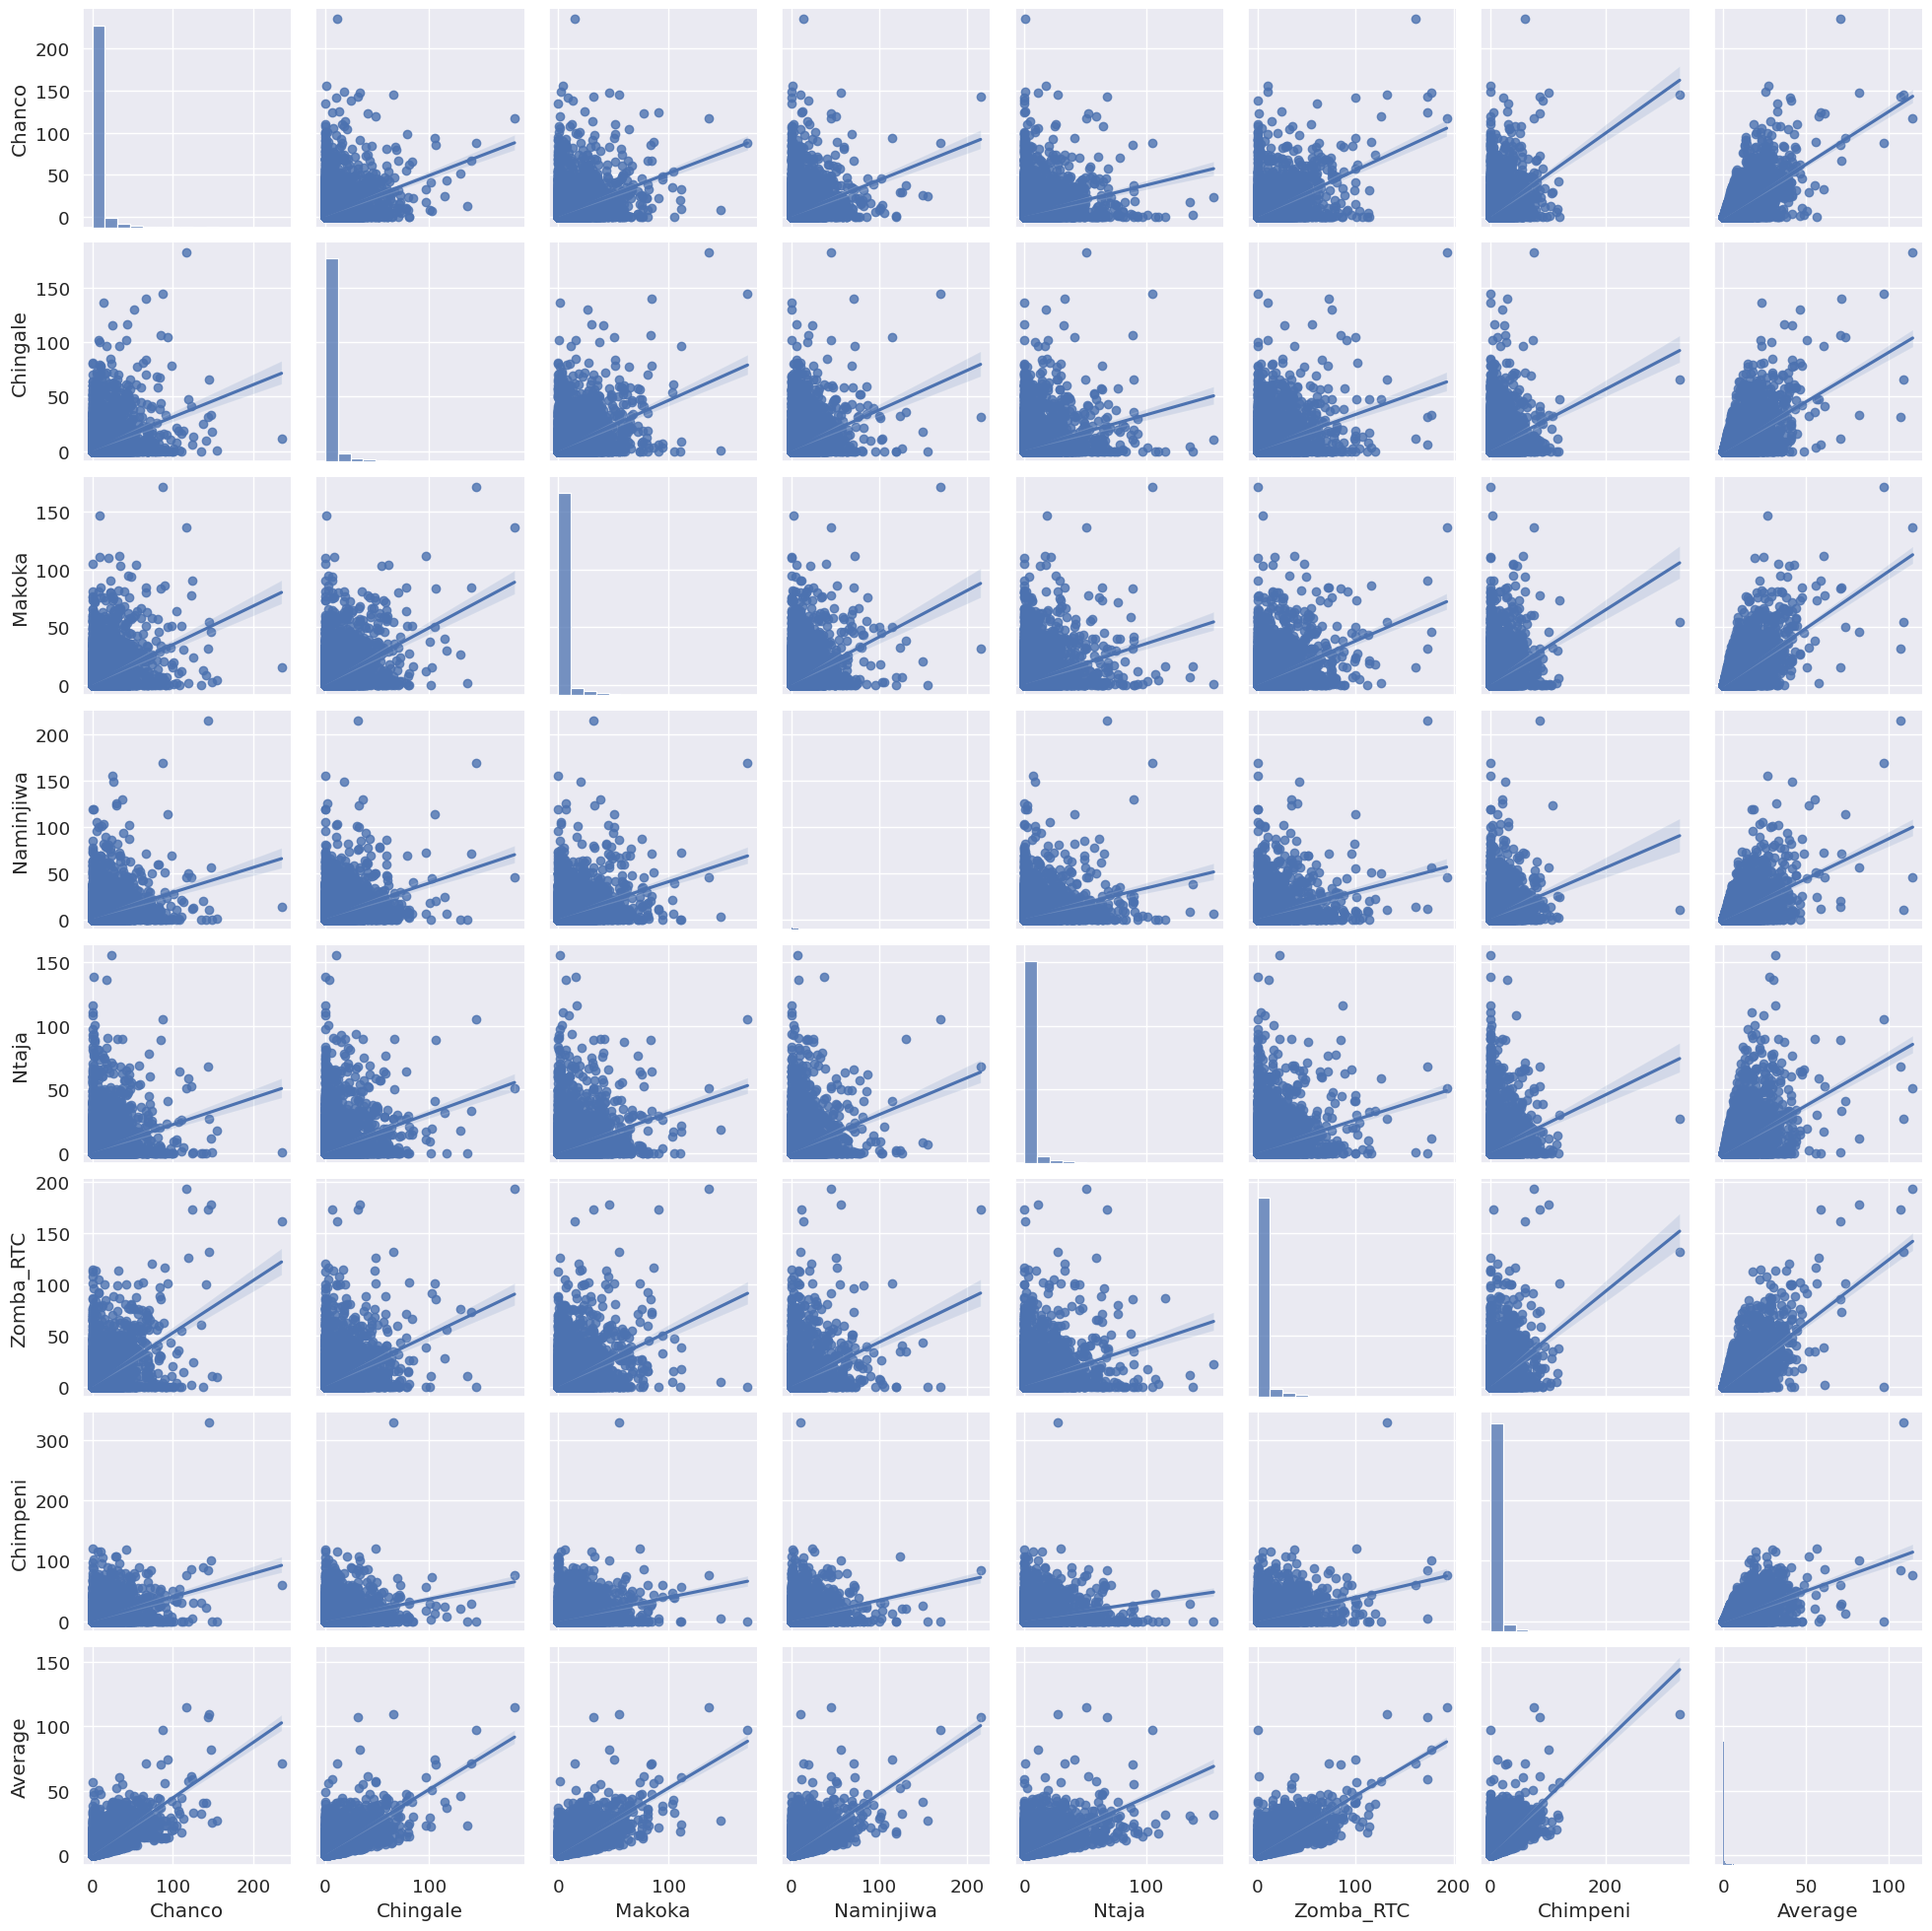

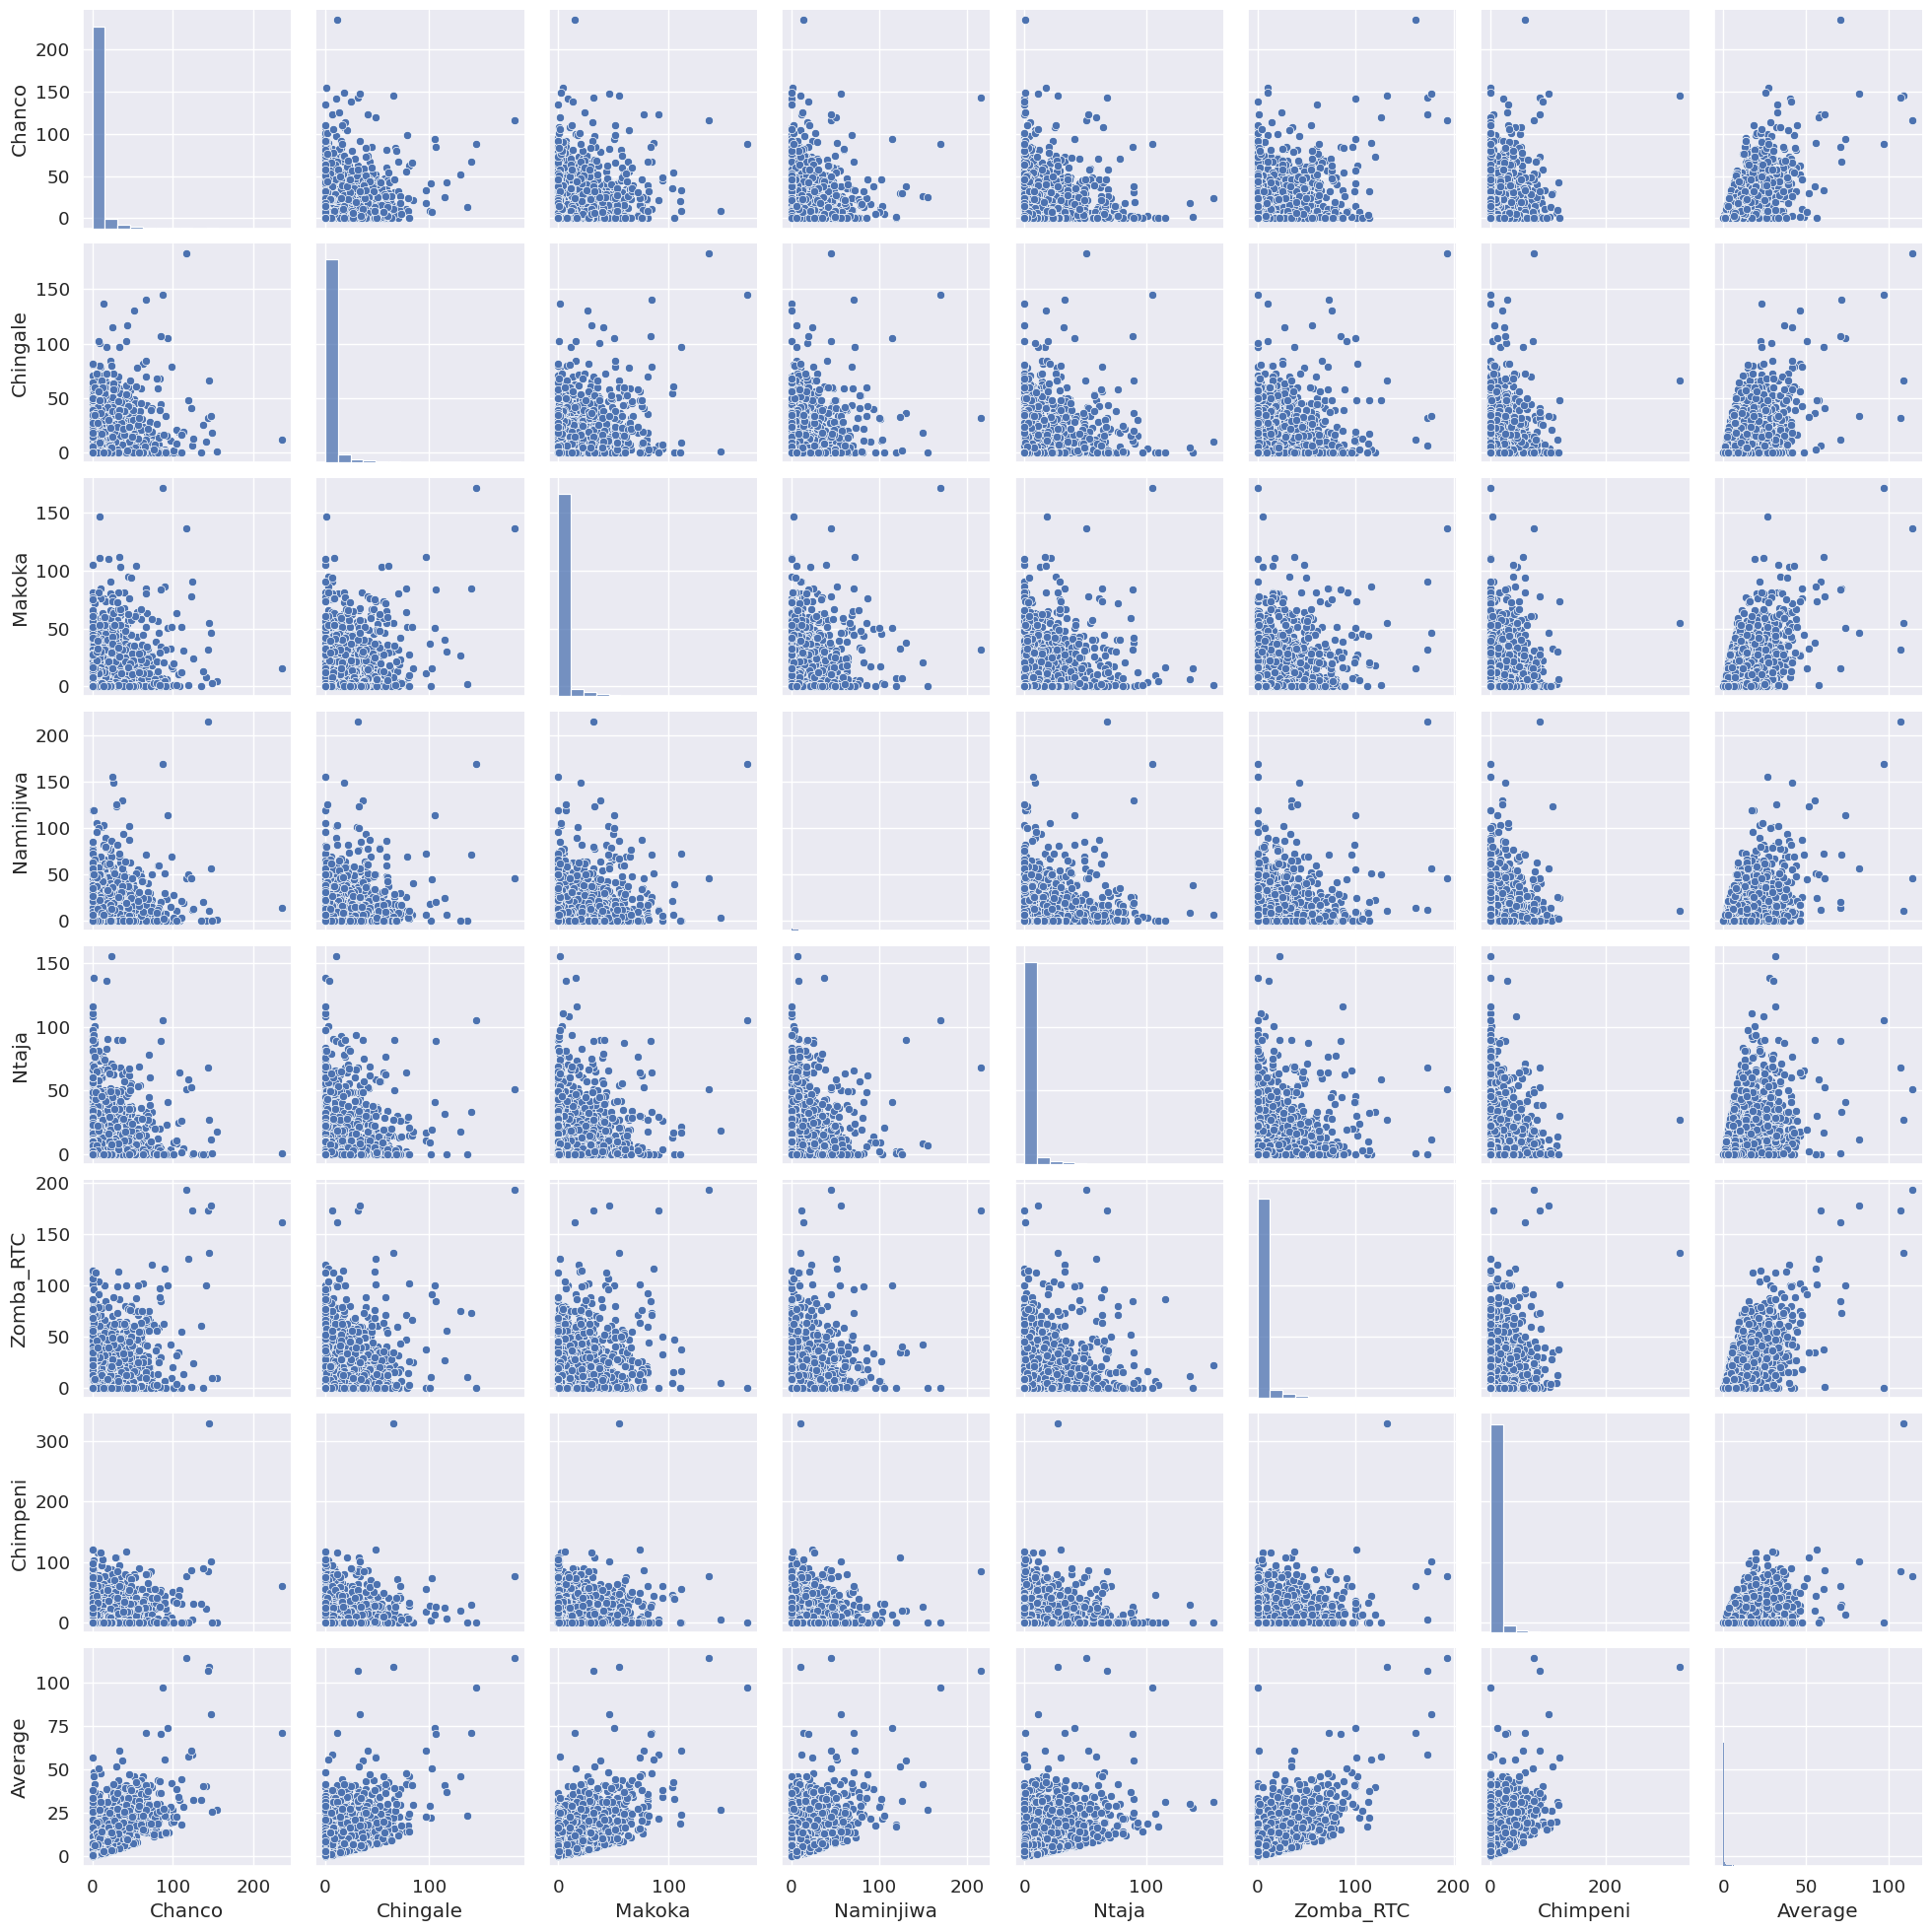

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# The dataset is called 'data'
column_names = ['Date', 'Chanco', 'Chingale', 'Makoka', 'Naminjiwa', 'Ntaja', 'Zomba_RTC', 'Chimpeni', 'Average']
start_date = '1/1/1981'  # Specify the start date
end_date = '12/31/2018'  # Specify the end date

# Remove leading and trailing spaces from column names
column_names = [column.strip() for column in column_names]

# Filter the data based on the column names and date range
sub_dataset_rainfall_2 = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# Convert 'Date' column to datetime type
sub_dataset_rainfall_2['Date'] = pd.to_datetime(sub_dataset_rainfall_2['Date'])

# Set 'Date' column as the index
sub_dataset_rainfall_2.set_index('Date', inplace=True)

# Check the type of dataset
print("Data types:", sub_dataset_rainfall_2.dtypes)

# Check the shape of the data
print("Data shape:", sub_dataset_rainfall_2.shape)

# Save the subdataset as an Excel file
sub_dataset_rainfall_2.to_excel("sub_dataset_rainfall_2.xlsx", index=True)

# Define the markers for each dataset
markers = ['o', 's', 'D', 'v', '^','o', 's', 'D']

# Plotting the dataset
plt.figure(figsize=(12, 6))
for i, column in enumerate(column_names[1:]):
    sns.lineplot(data=sub_dataset_rainfall_2[column], marker=markers[i])  # Use the column as the data and specify the marker

plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Data')
plt.legend(column_names[1:])  # Fix: Start the legend from index 0

# Add grid lines
plt.grid(True)

# Set ticks on months
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))

# Adjust the axes
plt.gca().margins(x=0)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the plot as a high-quality PNG file
plt.savefig('rainfall_plot_2.png', dpi=300, bbox_inches='tight')

# Save the plot as a high-quality JPG file
plt.savefig('rainfall_plot_2.jpg', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Create a pair plot with regression
sns.set(font_scale=1.2)  # Increase the font size for better legibility
pairplot_reg = sns.pairplot(sub_dataset_rainfall_2, kind="reg")
pairplot_reg.savefig('sub_dataset_rainfall_2_pairplot_reg.png', dpi=300, bbox_inches='tight')
pairplot_reg.savefig('sub_dataset_rainfall_2_pairplot_reg.jpg', dpi=300, bbox_inches='tight')

# Create a pair plot without regression
sns.set(font_scale=1.2)  # Increase the font size for better legibility
pairplot_scatter = sns.pairplot(sub_dataset_rainfall_2, kind="scatter")
pairplot_scatter.savefig('sub_dataset_rainfall_2_pairplot_scatter.png', dpi=300, bbox_inches='tight')
pairplot_scatter.savefig('sub_dataset_rainfall_2_pairplot_scatter.jpg', dpi=300, bbox_inches='tight')


### 4.2.2 Correlation of Rainfall
This code processes rainfal data, filters it based on a specific date range and desired columns, calculates the correlation matrix, saves it as an Excel file, and generates a correlation heatmap plot. The plot is saved as high-quality PNG and JPG files. Finally, the correlation matrix is displayed.

**Rainfall start_date = '5/1/1974' end_date = '12/1/1987'**

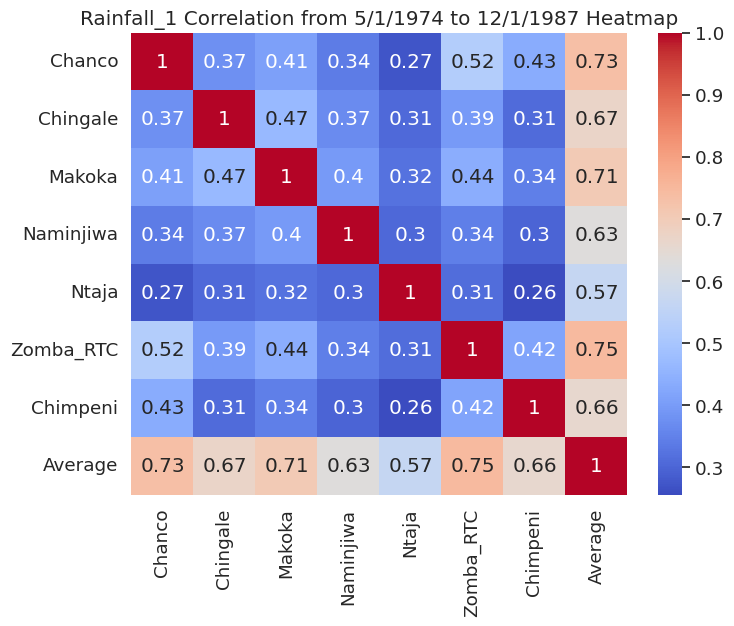

             Chanco  Chingale    Makoka  Naminjiwa     Ntaja  Zomba_RTC  \
Chanco     1.000000  0.374648  0.408954   0.336921  0.271656   0.524210   
Chingale   0.374648  1.000000  0.466715   0.368770  0.305590   0.394975   
Makoka     0.408954  0.466715  1.000000   0.395757  0.319405   0.436643   
Naminjiwa  0.336921  0.368770  0.395757   1.000000  0.302334   0.343091   
Ntaja      0.271656  0.305590  0.319405   0.302334  1.000000   0.312020   
Zomba_RTC  0.524210  0.394975  0.436643   0.343091  0.312020   1.000000   
Chimpeni   0.434219  0.309117  0.344382   0.297497  0.255343   0.415972   
Average    0.734019  0.669372  0.706138   0.631908  0.566108   0.745502   

           Chimpeni   Average  
Chanco     0.434219  0.734019  
Chingale   0.309117  0.669372  
Makoka     0.344382  0.706138  
Naminjiwa  0.297497  0.631908  
Ntaja      0.255343  0.566108  
Zomba_RTC  0.415972  0.745502  
Chimpeni   1.000000  0.657014  
Average    0.657014  1.000000  


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# The dataset is called 'data'
column_names = ['Date', 'Chanco', 'Chingale', 'Makoka', 'Naminjiwa', 'Ntaja', 'Zomba_RTC', 'Chimpeni', 'Average']
start_date = '1/1/1981'  # Specify the start date
end_date = '12/31/2018'  # Specify the end date

# Remove leading and trailing spaces from column names
column_names = [column.strip() for column in column_names]

# Filter the data based on the column names and date range
sub_dataset_rainfall_1 = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date), column_names]

# Set 'Date' column as the index
sub_dataset_rainfall_1.set_index('Date', inplace=True)

# Calculate the correlation matrix
rainfall_1_correlation_matrix = sub_dataset_rainfall_1.corr()

# Save the correlation matrix as an Excel file
rainfall_1_correlation_matrix.to_excel('rainfall_1_correlation_matrix.xlsx')

# Create a correlation heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(rainfall_1_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Rainfall_1 Correlation from 5/1/1974 to 12/1/1987 Heatmap')
plt.savefig('rainfall_1_correlation_plot.jpg', dpi=300, bbox_inches='tight')
plt.savefig('rainfall_1_correlation_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Display the correlation matrix
print(rainfall_1_correlation_matrix)

**creat monthly rainfall**

In [39]:
import pandas as pd

url = 'https://github.com/mtofighi/ChilwaBasin/blob/main/ClimateAnalysis/Data/ChilwaBasin_Rainfall_19812018.xlsx?raw=true'
data = pd.read_excel(url)

# Convert the index to datetime format (assuming the index is in a date format)
data.index = pd.to_datetime(data.iloc[:, 0])

# Assuming your current dataset is named 'data'
# Convert the 'Date' column to datetime type if it's not already
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' column as the index
data.set_index('Date', inplace=True)

# Resample the data to monthly frequency, taking the first day of each month
monthly_data = data.resample('MS').agg({'Chanco': 'sum', 'Chingale': 'sum', 'Makoka': 'sum', 'Naminjiwa': 'sum',
                                       'Ntaja': 'sum', 'Zomba_RTC': 'sum', 'Chimpeni': 'sum', 'Average': 'sum'})

# Reset the index to have a default integer index
monthly_data.reset_index(inplace=True)

# Format the 'Date' column as 2/1/2000
monthly_data['Date'] = monthly_data['Date'].dt.strftime('%m/%d/%Y')

# Print the first few rows of the new monthly dataset
print(monthly_data.head())

# Save the monthly dataset as an Excel file
monthly_data.to_excel("monthly_data_aggregated.xlsx", index=False)

         Date  Chanco  Chingale  Makoka  Naminjiwa  Ntaja  Zomba_RTC  \
0  01/01/1981   154.4      71.3   219.2      188.2   79.3      109.6   
1  02/01/1981   453.8     249.7   305.2      175.1  226.7      225.4   
2  03/01/1981   258.2     100.7   119.1      135.2   83.3       60.9   
3  04/01/1981    32.4       6.2    25.2       50.6   22.8        3.5   
4  05/01/1981     3.9       4.2     2.1        2.8   14.0        0.0   

   Chimpeni     Average  
0    92.456  130.636571  
1   325.882  280.254571  
2    94.488  121.698286  
3    11.430   21.732857  
4     0.000    3.857143  


correlation monthly rainfall

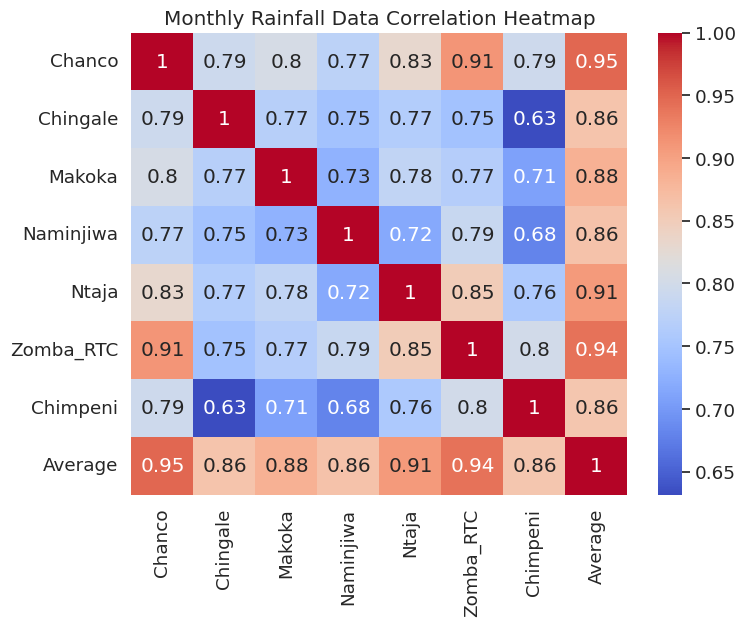

             Chanco  Chingale    Makoka  Naminjiwa     Ntaja  Zomba_RTC  \
Chanco     1.000000  0.793002  0.804355   0.774413  0.830384   0.911700   
Chingale   0.793002  1.000000  0.769529   0.748062  0.765257   0.747646   
Makoka     0.804355  0.769529  1.000000   0.727488  0.781252   0.765531   
Naminjiwa  0.774413  0.748062  0.727488   1.000000  0.716818   0.788097   
Ntaja      0.830384  0.765257  0.781252   0.716818  1.000000   0.851038   
Zomba_RTC  0.911700  0.747646  0.765531   0.788097  0.851038   1.000000   
Chimpeni   0.794424  0.631657  0.709000   0.679370  0.757267   0.798846   
Average    0.948446  0.862962  0.883639   0.863842  0.907657   0.940901   

           Chimpeni   Average  
Chanco     0.794424  0.948446  
Chingale   0.631657  0.862962  
Makoka     0.709000  0.883639  
Naminjiwa  0.679370  0.863842  
Ntaja      0.757267  0.907657  
Zomba_RTC  0.798846  0.940901  
Chimpeni   1.000000  0.859000  
Average    0.859000  1.000000  


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your new monthly dataset is named 'monthly_data'
# Specify the start and end date for the new dataset
start_date = '1/1/1981'
end_date = '12/31/2018'

# Filter the new monthly dataset based on the date range
monthly_data_filtered = monthly_data.loc[(monthly_data['Date'] >= start_date) & (monthly_data['Date'] <= end_date)]

# Set 'Date' column as the index
monthly_data_filtered.set_index('Date', inplace=True)

# Calculate the correlation matrix
correlation_matrix_monthly_rainfall = monthly_data_filtered.corr()

# Save the correlation matrix as an Excel file
correlation_matrix_monthly_rainfall.to_excel('correlation_matrix_monthly_rainfall.xlsx')

# Create a correlation heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_monthly_rainfall, annot=True, cmap='coolwarm')
plt.title('Monthly Rainfall Data Correlation Heatmap')
plt.savefig('monthly_rainfall_data_correlation_plot.jpg', dpi=300, bbox_inches='tight')
plt.savefig('monthly_Rainfall_data_correlation_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Display the correlation matrix
print(correlation_matrix_monthly_rainfall)


Mean Absolute Error (MAE): 37.83
Mean Squared Error (MSE): 3197.60
Root Mean Squared Error (RMSE): 56.55


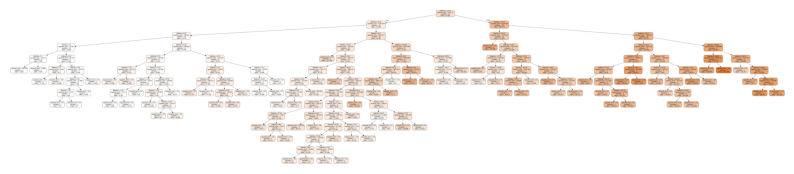

All outputs saved successfully.


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text, export_graphviz
from sklearn import metrics
import matplotlib.pyplot as plt
import graphviz

# Load the data (replace 'monthly_data_filtered.xlsx' with your actual file name)
monthly_data_filtered

# Features (X) and target variable (y)
features = ['Makoka']
target = 'Average'

# Select relevant columns
data = monthly_data_filtered[features + [target]]

# Prepare data
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

# Display evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Export the Decision Tree to a Graphviz file
dot_data = export_graphviz(dt_model, out_file=None, feature_names=features, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('decision_tree', format='png', cleanup=True)

# Display the Decision Tree
plt.figure(figsize=(10, 5))
img = plt.imread('decision_tree.png')
plt.imshow(img)
plt.axis('off')
plt.show()

# Save the model predictions
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).to_excel('predictions_filtered.xlsx', index=False)

# Save feature importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': dt_model.feature_importances_})
feature_importances.to_excel('feature_importances_filtered.xlsx', index=False)

# Generate rules from the Decision Tree
tree_rules = export_text(dt_model, feature_names=features)
with open('decision_tree_rules_filtered.txt', 'w') as f:
    f.write(tree_rules)

print("All outputs saved successfully.")


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the data (replace 'monthly_data_filtered.xlsx' with your actual file name)
monthly_data_filtered

# Features (X) and target variable (y)
features = ['Makoka']
target = 'Average'

# Select relevant columns
data = monthly_data_filtered[features + [target]]

# Prepare data
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

# Display evaluation metrics
print(f'Linear Regression - Mean Absolute Error (MAE): {mae:.2f}')
print(f'Linear Regression - Mean Squared Error (MSE): {mse:.2f}')
print(f'Linear Regression - Root Mean Squared Error (RMSE): {rmse:.2f}')

# Save the model predictions
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).to_excel('linear_regression_predictions.xlsx', index=False)

print("Linear regression outputs saved successfully.")


Linear Regression - Mean Absolute Error (MAE): 32.07
Linear Regression - Mean Squared Error (MSE): 1839.39
Linear Regression - Root Mean Squared Error (RMSE): 42.89
Linear regression outputs saved successfully.


In [41]:
import pandas as pd

# Load the monthly dataset
monthly_data_filtered

# Print the average of each column
column_averages = monthly_data_filtered.mean()
print("Average of each column:\n", column_averages)

# Calculate the anomaly of the 'Average' rainfall
average_mean = monthly_data_filtered['Average'].mean()
monthly_data_filtered['Rainfall_Anomaly'] = monthly_data_filtered['Average'] - average_mean

# Save the dataset with the anomaly column, including the 'Date' column
monthly_data_with_anomaly = "monthly_data_with_anomaly.xlsx"
monthly_data_filtered.to_excel(monthly_data_with_anomaly, index=False)

# Display the first few rows of the updated dataset
print("\nUpdated dataset with anomaly:\n", monthly_data_filtered.head())


Average of each column:
 Chanco       122.079825
Chingale      83.217544
Makoka        96.176316
Naminjiwa     99.985088
Ntaja         79.576316
Zomba_RTC    118.216667
Chimpeni      91.152877
Average       98.629233
dtype: float64

Updated dataset with anomaly:
             Chanco  Chingale  Makoka  Naminjiwa  Ntaja  Zomba_RTC  Chimpeni  \
Date                                                                          
10/01/1981     9.6      36.3    72.1        6.5   39.2       11.0     0.000   
11/01/1981   115.3      97.9    42.6       26.7   36.2       67.0    24.384   
12/01/1981    96.7     102.3   207.4      233.3   41.9      116.0   178.054   
10/01/1982     7.0      17.4    38.2       34.4   66.4       70.8    45.500   
11/01/1982    59.6      86.3    49.1       25.9  121.4       49.7    42.000   

               Average  Rainfall_Anomaly  
Date                                      
10/01/1981   24.957143        -73.672090  
11/01/1981   58.583429        -40.045805  
12/01/1981

<ipython-input-41-8195c7626033>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_data_filtered['Rainfall_Anomaly'] = monthly_data_filtered['Average'] - average_mean


## 4.6  Disease Analysis

### 4.6.1  Comparison of Disease Incidents

This code generates two plots comparing the incidents of malnutrition and cholera in a specific time period. The first plot shows the correlation between new cases and inpatient deaths of malnutrition in all districts. The second plot depicts the relationship between the cases and deaths caused by cholera in all districts. The plots provide visual insights into the dynamics of these diseases during the specified time frame.

### 4.6.4 Diarrhea Cases Prediction Using Decision Trees and Random Forests

This code implements a prediction model for diarrhea cases using decision tree regressors and random forest regressors. It filters and cleans the dataset, splits it into training and testing sets, trains the models, and evaluates their performance. Additionally, it visualizes the decision tree, plots feature importances, and generates rules for both models. The code also saves various outputs, such as Excel files for data, training/testing sets, and evaluation metrics.

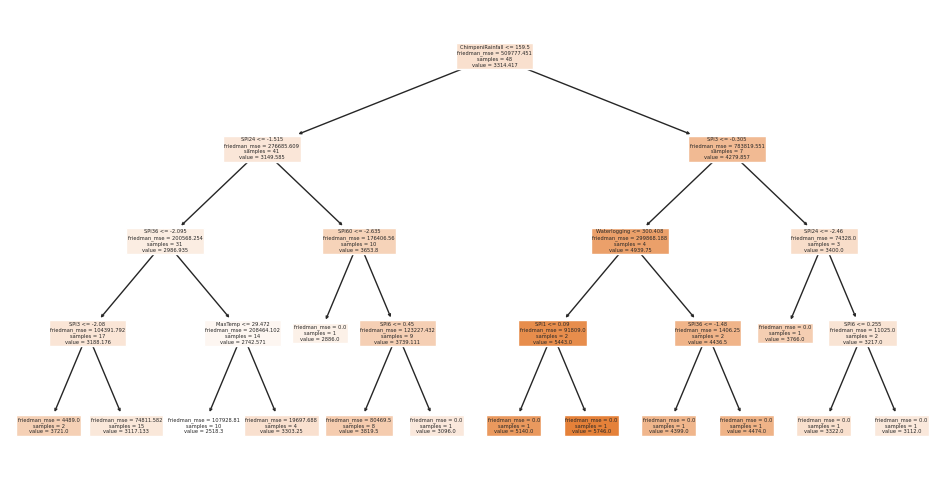

Decision Tree Model Performance:
Mean Squared Error: 1236111.165324074
Root Mean Squared Error: 1111.8053630577945
R2 Score: -0.20657047417293417
Random Forest Model Performance:
Mean Squared Error: 734439.6803865378
Root Mean Squared Error: 856.9945626353401
R2 Score: 0.2831120223858844


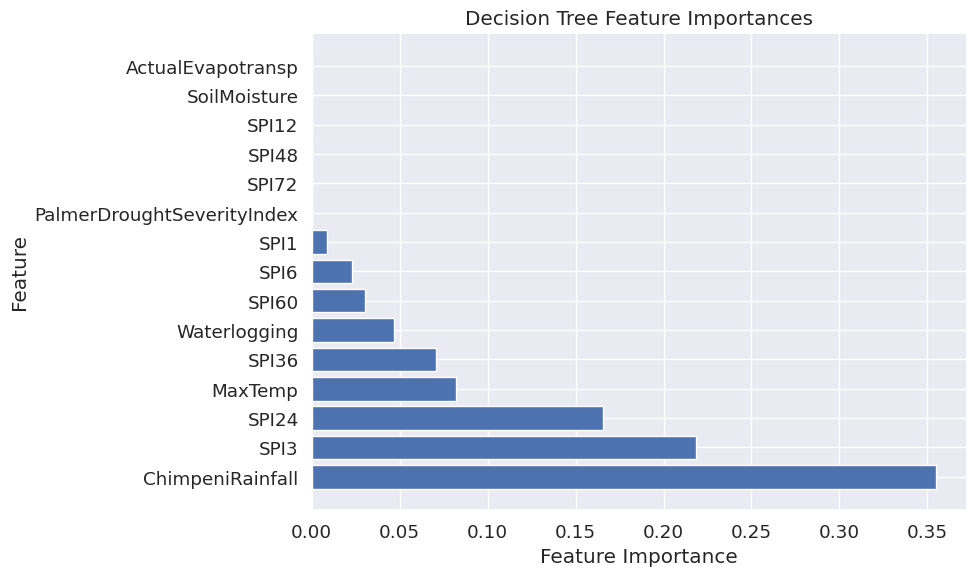

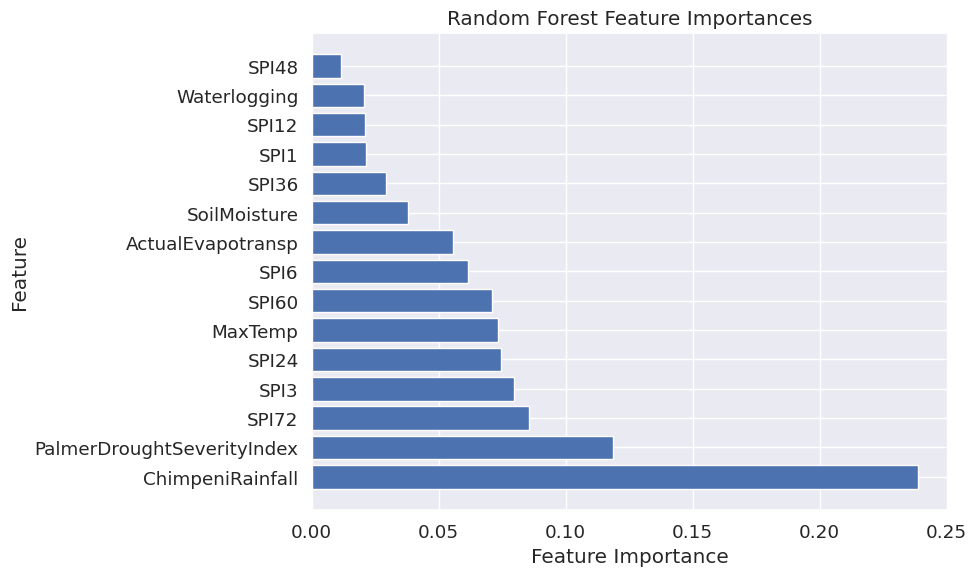

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# The dataset is called 'data'
column_names = [
    'Date', 'ChimpeniRainfall', 'ActualEvapotransp',
    'SoilMoisture', 'SPI1', 'SPI3', 'SPI6',
    'SPI12', 'SPI24', 'SPI36', 'SPI48', 'SPI60', 'SPI72', 'Waterlogging',
    'MaxTemp',
    'PalmerDroughtSeverityIndex',
    'DiarrhoeaCases_AllDistricts',
    'SchistosomiasisCases_AllDistricts',
]  # Specify the desired column names

start_date = '2017-01-01'  # Specify the start date
end_date = '2021-12-01'  # Specify the end date

# Filter the data based on the column names and date range
sub_dataset = data.loc[
    (data['Date'] >= start_date) & (data['Date'] <= end_date), column_names
]

# Save the filtered data as Excel
sub_dataset.to_excel('filtered_data.xlsx', index=False)

# Drop rows with missing values
sub_dataset.dropna(inplace=True)

# Save the cleaned data as Excel
sub_dataset.to_excel('cleaned_data.xlsx', index=False)

# Extract the features
features = sub_dataset[
    [
        'ChimpeniRainfall', 'ActualEvapotransp',
        'SoilMoisture', 'SPI1', 'SPI3', 'SPI6',
        'SPI12', 'SPI24', 'SPI36', 'SPI48', 'SPI60', 'SPI72', 'Waterlogging',
        'MaxTemp', 'PalmerDroughtSeverityIndex'
    ]
]

# Extract the target variable
target = sub_dataset['DiarrhoeaCases_AllDistricts']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Create a decision tree regressor with max_depth=4 and criterion='friedman_mse'
decision_tree_regressor = DecisionTreeRegressor(max_depth=4, criterion='friedman_mse')

# Fit the decision tree regressor to the training data
decision_tree_regressor.fit(X_train, y_train)

# Create a random forest regressor with n_estimators=100 and max_depth=6
random_forest_regressor = RandomForestRegressor(n_estimators=100, max_depth=6)

# Fit the random forest regressor to the training data
random_forest_regressor.fit(X_train, y_train)

# Get feature importances from the decision tree regressor
decision_tree_importances = decision_tree_regressor.feature_importances_

# Sort feature importances in descending order for decision tree
decision_tree_sorted_indices = np.argsort(decision_tree_importances)[::-1]
decision_tree_sorted_importances = decision_tree_importances[decision_tree_sorted_indices]

# Get the names of the features in descending order of importance for decision tree
decision_tree_sorted_feature_names = features.columns[decision_tree_sorted_indices]

# Get feature importances from the random forest regressor
random_forest_importances = random_forest_regressor.feature_importances_

# Sort feature importances in descending order for random forest
random_forest_sorted_indices = np.argsort(random_forest_importances)[::-1]
random_forest_sorted_importances = random_forest_importances[random_forest_sorted_indices]

# Get the names of the features in descending order of importance for random forest
random_forest_sorted_feature_names = features.columns[random_forest_sorted_indices]

# Visualize the decision tree using plot_tree
plt.figure(figsize=(12, 6))
plot_tree(decision_tree_regressor, feature_names=features.columns, filled=True)
plt.savefig('decision_tree_diarrhea_cases.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot feature importances for decision tree
plt.figure(figsize=(10, 6))
plt.barh(range(len(decision_tree_sorted_importances)), decision_tree_sorted_importances, align='center')
plt.yticks(range(len(decision_tree_sorted_importances)), decision_tree_sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importances')
plt.tight_layout()
plt.savefig('decision_tree_feature_importance.png')

# Plot feature importances for random forest
plt.figure(figsize=(10, 6))
plt.barh(range(len(random_forest_sorted_importances)), random_forest_sorted_importances, align='center')
plt.yticks(range(len(random_forest_sorted_importances)), random_forest_sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.savefig('random_forest_feature_importance.png')

# Generate rules as Python function code for decision tree
decision_tree_rules = export_text(decision_tree_regressor, feature_names=features.columns.tolist())
decision_tree_rules_text = "def predict_diarrhea_cases_decision_tree(\n"
decision_tree_rules_text += ",\n".join([f"\t{column}" for column in features.columns]) + "):\n"
decision_tree_rules_text += "\t# Decision Rules:\n"
decision_tree_rules_text += decision_tree_rules.replace("|---", "if").replace("|", "\t").replace(":", ":")

# Save rules as Python function code in a text file for decision tree
with open('diarrhea_cases_rules_decision_tree.py', 'w') as file:
    file.write(decision_tree_rules_text)

# Generate rules as Python function code for random forest
random_forest_rules_text = "def predict_diarrhea_cases_random_forest(\n"
random_forest_rules_text += ",\n".join([f"\t{column}" for column in features.columns]) + "):\n"
random_forest_rules_text += "\t# Decision Rules:\n"
random_forest_rules_text += "Use the predict method of the random forest regressor to make predictions."

# Save rules as Python function code in a text file for random forest
with open('diarrhea_cases_rules_random_forest.py', 'w') as file:
    file.write(random_forest_rules_text)

# Save the training and testing sets as Excel
X_train.to_excel('X_train.xlsx', index=False)
X_test.to_excel('X_test.xlsx', index=False)
y_train.to_excel('y_train.xlsx', index=False)
y_test.to_excel('y_test.xlsx', index=False)

# Make predictions on the testing set using decision tree regressor
y_pred_decision_tree = decision_tree_regressor.predict(X_test)

# Make predictions on the testing set using random forest regressor
y_pred_random_forest = random_forest_regressor.predict(X_test)

# Evaluate decision tree model performance
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

# Evaluate random forest model performance
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mse_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

# Print the evaluation metrics for decision tree model
print("Decision Tree Model Performance:")
print("Mean Squared Error:", mse_decision_tree)
print("Root Mean Squared Error:", rmse_decision_tree)
print("R2 Score:", r2_decision_tree)

# Print the evaluation metrics for random forest model
print("Random Forest Model Performance:")
print("Mean Squared Error:", mse_random_forest)
print("Root Mean Squared Error:", rmse_random_forest)
print("R2 Score:", r2_random_forest)


### 4.6.6 Analysis of Schistosomiasis Cases and Predictive Modeling

Summary:
This code performs an analysis of Schistosomiasis cases using historical data and builds predictive models using Decision Tree Regressor and Random Forest Regressor. It includes data preprocessing, feature extraction, visualization of decision tree, feature importance plots, and evaluation metrics for the models. The code generates relevant charts and saves them as image files. The output provides a concise summary of the evaluation metrics for both models.

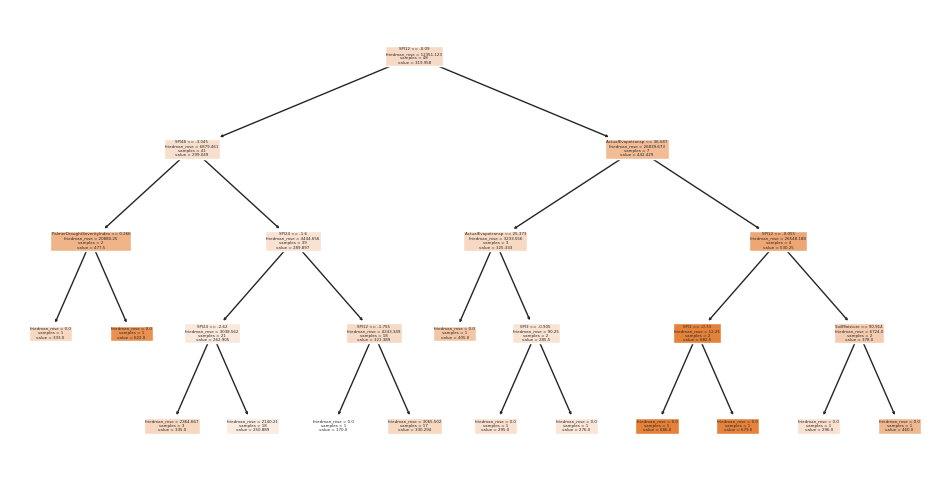

Evaluation metrics for Decision Tree Regressor:
Mean Squared Error (MSE): 12104.112499466019
Coefficient of Determination (R^2 score): -0.40036266576504187

Evaluation metrics for Random Forest Regressor:
Mean Squared Error (MSE): 6898.775943725108
Coefficient of Determination (R^2 score): 0.20185901514903892


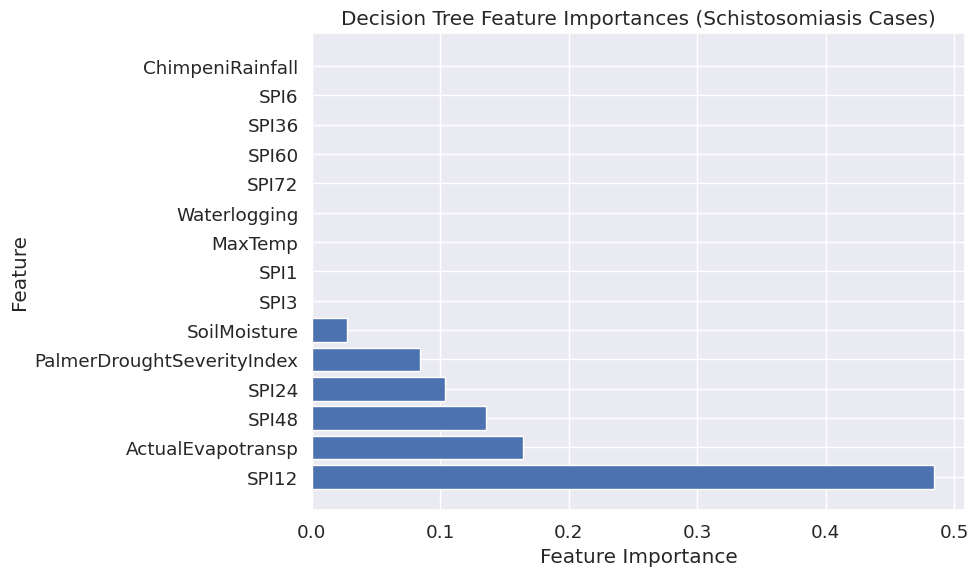

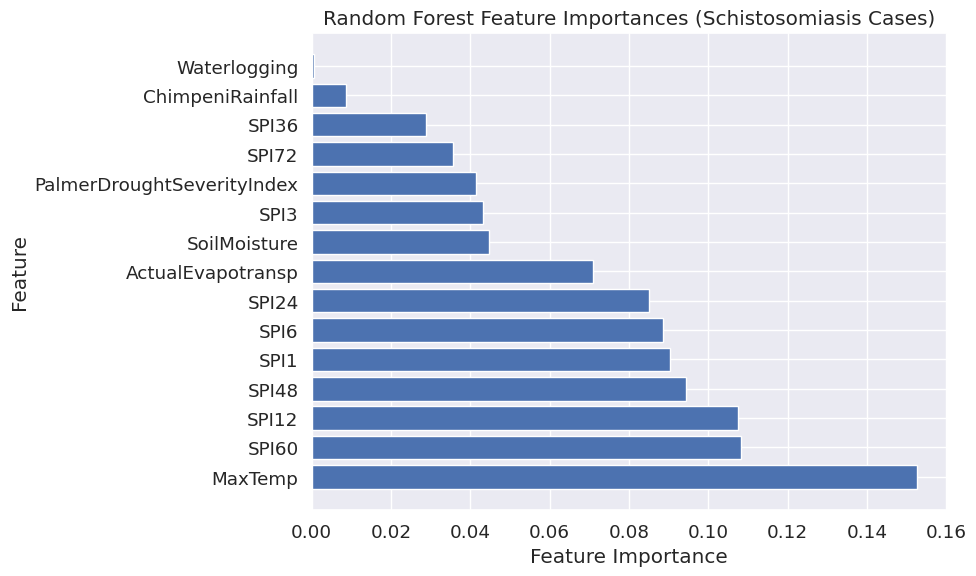

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# The dataset is called 'data'
column_names = [
    'Date', 'ChimpeniRainfall', 'ActualEvapotransp',
    'SoilMoisture', 'SPI1', 'SPI3', 'SPI6',
    'SPI12', 'SPI24', 'SPI36', 'SPI48', 'SPI60', 'SPI72', 'Waterlogging',
    'MaxTemp',
    'PalmerDroughtSeverityIndex',
    'DiarrhoeaCases_AllDistricts',
    'SchistosomiasisCases_AllDistricts',
]  # Specify the desired column names

start_date = '2017-01-01'  # Specify the start date
end_date = '2021-12-01'  # Specify the end date

# Filter the data based on the column names and date range
sub_dataset = data.loc[
    (data['Date'] >= start_date) & (data['Date'] <= end_date), column_names
]

# Save the filtered data as Excel
sub_dataset.to_excel('filtered_data.xlsx', index=False)

# Drop rows with missing values
sub_dataset.dropna(inplace=True)

# Save the cleaned data as Excel
sub_dataset.to_excel('cleaned_data.xlsx', index=False)

# Extract the features
features = sub_dataset[
    [
        'ChimpeniRainfall', 'ActualEvapotransp',
        'SoilMoisture', 'SPI1', 'SPI3', 'SPI6',
        'SPI12', 'SPI24', 'SPI36', 'SPI48', 'SPI60', 'SPI72', 'Waterlogging',
        'MaxTemp', 'PalmerDroughtSeverityIndex'
    ]
]

# Extract the target variable
target = sub_dataset['SchistosomiasisCases_AllDistricts']

# Check the number of available samples
num_samples = len(features)

if num_samples == 0:
    print("Insufficient samples after dropping missing values.")
else:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.2, random_state=42
    )

    # Create a decision tree regressor with max_depth=4 and criterion='friedman_mse'
    decision_tree_regressor = DecisionTreeRegressor(max_depth=4, criterion='friedman_mse')

    # Fit the decision tree regressor to the training data
    decision_tree_regressor.fit(X_train, y_train)

    # Create a random forest regressor with n_estimators=100 and max_depth=6
    random_forest_regressor = RandomForestRegressor(n_estimators=100, max_depth=6)

    # Fit the random forest regressor to the training data
    random_forest_regressor.fit(X_train, y_train)

    # Get feature importances from the decision tree regressor
    decision_tree_importances = decision_tree_regressor.feature_importances_

    # Sort feature importances in descending order for decision tree
    decision_tree_sorted_indices = np.argsort(decision_tree_importances)[::-1]
    decision_tree_sorted_importances = decision_tree_importances[decision_tree_sorted_indices]

    # Get the names of the features in descending order of importance for decision tree
    decision_tree_sorted_feature_names = features.columns[decision_tree_sorted_indices]

    # Get feature importances from the random forest regressor
    random_forest_importances = random_forest_regressor.feature_importances_

    # Sort feature importances in descending order for random forest
    random_forest_sorted_indices = np.argsort(random_forest_importances)[::-1]
    random_forest_sorted_importances = random_forest_importances[random_forest_sorted_indices]

    # Get the names of the features in descending order of importance for random forest
    random_forest_sorted_feature_names = features.columns[random_forest_sorted_indices]

    # Visualize the decision tree using plot_tree
    plt.figure(figsize=(12, 6))
    plot_tree(decision_tree_regressor, feature_names=features.columns, filled=True)
    plt.savefig('decision_tree_schistosomiasis_cases.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Plot feature importances for decision tree
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(decision_tree_sorted_importances)), decision_tree_sorted_importances, align='center')
    plt.yticks(range(len(decision_tree_sorted_importances)), decision_tree_sorted_feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Decision Tree Feature Importances (Schistosomiasis Cases)')
    plt.tight_layout()
    plt.savefig('decision_tree_feature_importance_schistosomiasis_cases.png')

    # Plot feature importances for random forest
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(random_forest_sorted_importances)), random_forest_sorted_importances, align='center')
    plt.yticks(range(len(random_forest_sorted_importances)), random_forest_sorted_feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Random Forest Feature Importances (Schistosomiasis Cases)')
    plt.tight_layout()
    plt.savefig('random_forest_feature_importance_schistosomiasis_cases.png')

    # Generate rules as Python function code for decision tree
    decision_tree_rules = export_text(decision_tree_regressor, feature_names=features.columns.tolist())
    decision_tree_rules_text = "def predict_schistosomiasis_cases_decision_tree(\n"
    decision_tree_rules_text += ",\n".join([f"\t{column}" for column in features.columns]) + "):\n"
    decision_tree_rules_text += "\t# Decision Rules:\n"
    decision_tree_rules_text += decision_tree_rules.replace("|---", "if").replace("|", "\t").replace(":", ":")

    # Save rules as Python function code in a text file for decision tree
    with open('schistosomiasis_cases_rules_decision_tree.py', 'w') as file:
        file.write(decision_tree_rules_text)

    # Generate rules as Python function code for random forest
    random_forest_rules_text = "def predict_schistosomiasis_cases_random_forest(\n"
    random_forest_rules_text += ",\n".join([f"\t{column}" for column in features.columns]) + "):\n"
    random_forest_rules_text += "\t# Decision Rules:\n"
    random_forest_rules_text += "Use the predict method of the random forest regressor to make predictions."

    # Save rules as Python function code in a text file for random forest
    with open('schistosomiasis_cases_rules_random_forest.py', 'w') as file:
        file.write(random_forest_rules_text)

    # Save the training and testing sets as Excel
    X_train.to_excel('X_train_schistosomiasis_cases.xlsx', index=False)
    y_train.to_excel('y_train_schistosomiasis_cases.xlsx', index=False)
    X_test.to_excel('X_test_schistosomiasis_cases.xlsx', index=False)
    y_test.to_excel('y_test_schistosomiasis_cases.xlsx', index=False)

    # Make predictions using the decision tree regressor
    y_pred_decision_tree = decision_tree_regressor.predict(X_test)

    # Calculate mean squared error and coefficient of determination (R^2 score) for decision tree
    mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
    r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

    # Print evaluation metrics for decision tree
    print("Evaluation metrics for Decision Tree Regressor:")
    print("Mean Squared Error (MSE):", mse_decision_tree)
    print("Coefficient of Determination (R^2 score):", r2_decision_tree)

    # Make predictions using the random forest regressor
    y_pred_random_forest = random_forest_regressor.predict(X_test)

    # Calculate mean squared error and coefficient of determination (R^2 score) for random forest
    mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
    r2_random_forest = r2_score(y_test, y_pred_random_forest)

    # Print evaluation metrics for random forest
    print("\nEvaluation metrics for Random Forest Regressor:")
    print("Mean Squared Error (MSE):", mse_random_forest)
    print("Coefficient of Determination (R^2 score):", r2_random_forest)

# 5.0 Analyzing Meteorological Data Subset: Saving Excel File and Generating Pair Plots


This code focuses on analyzing a subset of a dataset that contains meteorological data. It selects specific columns based on provided names and filters the data based on a specified date range. The resulting subset is then saved as an Excel file.

Additionally, the code generates two pair plots using the seaborn library. One pair plot includes regression lines, while the other only displays scatter plots. Both plots provide visual insights into the relationships between variables in the meteorological dataset. The pair plots are saved as high-quality JPG files.

In [ ]:
import os

# Get the list of files in the current directory
files = os.listdir()

# Display the available files
print("Available files:")
for i, file in enumerate(files):
    print(f"{i + 1}. {file}")

# Ask for the file names to delete
files_to_delete = input("Enter the file numbers to delete (separated by spaces): ").split()

# Convert the file numbers to file names
files_to_delete = [files[int(num) - 1] for num in files_to_delete if num.isdigit() and int(num) <= len(files)]

# Check if the files exist and delete them
for filename in files_to_delete:
    if filename in files:
        os.remove(filename)
        print(f"File '{filename}' deleted.")
    else:
        print(f"File '{filename}' does not exist.")

Available files:
1. .config
2. sub_dataset_rainfall_1_pairplot_reg.jpg
3. sub_dataset_rainfall_1_pairplot_reg.png
4. sub_dataset_rainfall_1.xlsx
5. sub_dataset_rainfall_1_pairplot_scatter.jpg
6. rainfall_plot_1.jpg
7. rainfall_plot_1.png
8. sub_dataset_rainfall_1_pairplot_scatter.png
9. sample_data
Enter the file numbers to delete (separated by spaces): sub_dataset_rainfall_1_pairplot_reg.jpg
